<a href="https://colab.research.google.com/github/McNickSisto/world_data_league/blob/main/stage_final/Final_Notebook_6_0_mg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Data League 2021

## Authors
- Nicholas Sistovaris
- Moritz Geiger
- Pravalika Myneni
- Sowmya Madala

[Our Github Repository](https://github.com/McNickSisto/world_data_league/tree/main/stage_final)

## External links and resources

All the external data or resources that was not provided by the WDL was acquired through the following links:

1. [Noise modelling](https://noise-planet.org/noisemodelling.html)
2. [Turin Holidays](https://www.officeholidays.com/countries/italy/turin/2018)
3. [Events & Holidays 2018](https://www.feiertagskalender.ch/index.php?geo=3815&jahr=2018&hl=en)
4. [Noise Map](http://webgis.arpa.piemonte.it/basicviewer_arpa_webapp/index.html?webmap=89aa175451d24ae0a1911e67957d9aec)
5. [Statistical Zones Turin](http://aperto.comune.torino.it/dataset/zone-statistiche)
6. [Open Weather API](https://openweathermap.org/history)
7. [Google Places API](https://developers.google.com/maps/documentation/places/web-service/details) 
8. [Noise Paper](https://www.cirrusresearch.co.uk/blog/2013/01/noise-data-averaging-how-do-i-average-noise-measurements/)
9. [Leisure Noise Levels](https://zenodo.org/record/3482542#.YOHvyegzZPZ)
10. [Effects of Noise Pollution](https://www.eea.europa.eu/articles/noise-pollution-is-a-major)
11. [Hourly Transoprtation Data](https://www.mdpi.com/2306-5729/4/3/108/htm)
12. [Football Match Calendar](https://fixturedownload.com/download/csv/fifa-world-cup-2018)


## Introduction 🧐

**Challenge:** Improving the quality of life by reducing city
noise levels.

**Overview:**
From European Environment Agency (EEA) studies it is found that noise has great impact on health and well being of the people if exposed to an increased amount of noise. Some vulnerable groups have been particularly identified like *Children, Pregnant woman, elderly, Socio-economically disadvantaged people etc*. Not just humans the biodiversity can be negatively affected on terrestrial and aquatic species.

The city of Torino has been studying the noise levels of recreational nightlife noise in the
San Salvario area, which is home to many bars and clubs. They have installed several IoT
sensors in order to measure the noise levels with records since 2016, developed in San
Salvario the H2020 “MONICA” project as a large-scale demonstration of new and existing
IoT applications for a smarter living, and approved in 2021 the first Action Plan in Italy
focused on leisure noise.



**Research:**

**Noise Impact on San Salvario District:**

Nightlife activities in open-air create increasing challenges for vibrant cities, in terms of noise pollution and annoyance. City of Torino decided to face strategically this problem by an integrated approach and put in place a low-cost IoT noise monitoring network using several Android smartphones in San Salvario District, where a large number of restaurants, bars, pubs, and clubs attracts each weekend thousands of people spending all evening and night on terraces and streets, enjoying the amenity of this residential historical district.

**Effects of Noise on health:**

Long-term exposure to noise can cause a variety of health effects including annoyance, sleep disturbance, negative effects on the cardiovascular and metabolic system, as well as cognitive impairment in children.

Many people don’t realise noise pollution is an important problem, impacting human health, including theirs. Of course, there are many more premature deaths associated with air pollution than for noise. However, noise seems to have a larger impact on indicators related to quality of life and mental health. In fact, according to some World Health Organization (WHO) findings,  noise is the second largest environmental cause of health problems, just after the impact of air pollution.

Exposure to prolonged or excessive noise has been shown to cause a range of health problems ranging from stress, poor concentration, productivity losses in the workplace, and communication difficulties and fatigue from lack of sleep, to more serious issues such as cardiovascular disease, cognitive impairment, tinnitus and hearing loss.

**Our Approach**<br>
Our first step was to decide which data and target to use. We decided to focus on noise levels as a target because we found that there was little correlation between noise levels and police complaints.

We filtered the provided data to the year 2018, since the year had the most complete data. We assume that the noise pollution will be similar to current times after the lifting of all Covid restrictions. 

We enriched the data set by several beneficial features, like holiday data, traffic flow, football matches, opening hours of food and drinks establishments and weather around the sensors. 

Using this data we developed several time series models including a basic linear regression, moving averages and sarima, and other models displayed in the appendix of this notebook. 

The models that we developed can be effectvely predict the amount of noise emission at a certain hour or date. Based on these predictions we can intelligently inform the local government of Turin to implement policies against noise pollution. The suggested policies are taken from policies that were implemented during Covid and that have an impact in reducing noise pollution. 

## Development 🧑‍💻


In [1]:
!pip install geopandas --quiet
!pip install pmdarima --quiet
!pip install contextily --quiet

You should consider upgrading via the '/home/sisto/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/sisto/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/sisto/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


### Imports (libraries) 📚

In [70]:
## TABULAR
import pandas as pd 
import numpy as np
import matplotlib

## GEO
import geopandas as gpd
import fiona
import folium
from folium.plugins import MarkerCluster, HeatMap, BeautifyIcon
from folium.map import LayerControl, Layer, FeatureGroup
from folium.vector_layers import Circle, CircleMarker
from shapely.geometry import LineString, Point
from shapely import wkt


## DATA
import os
import zipfile
from collections import Counter
import re
from datetime import datetime
import requests
#from dotenv import load_dotenv, find_dotenv
import ast
import datetime as dt
from io import StringIO, BytesIO
from pandas.tseries.offsets import CustomBusinessHour



## VIS
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa
import branca
import plotly.express as px
import matplotlib.patches as patches
import contextily as ctx


## Feature Selection
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.datasets import load_digits

## TIME SERIES
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima 


## MODELLING
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import train_test_split 

# NEURAL NETWORKS
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Importing Dataframes 💾

Following a first glance at the dataframes provided by the WDL, we believed that using data from **2018** was our best bet to construct our model on. 

- First, we wanted to focus on understanding noise and complaints in the pre-covid context. The years 2020 and 2021 would have been unrepresentative of Turin's nightlife.

- Secondly, we wanted a feature that would represent the number of people outside on an hourly basis. The data on No. of Visitors based on WiFi was most complete and representative of the population outside. However, it only had data for October, November & December 2018. This is why we picked 2018 for the rest of our data.

In [3]:
# location of the sensors
# These are the sensors used for extracting the noise values for studying the noise levels during night life 
df_sensors_def = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/noise_sensor_list.csv', 
                            sep=';',
                             decimal=',')
df_sensors_def

code                                         address        Lat      Long  \
0  s_01                          Via Saluzzo, 26 Torino  45.059172  7.678986   
1  s_02              Via Principe Tommaso, 18bis Torino  45.057837  7.681555   
2  s_03                            Largo Saluzzo Torino  45.058518  7.678854   
3  s_05  Via Principe Tommaso angolo via Baretti Torino  45.057603  7.681348   
4  s_06                        Corso Marconi, 27 Torino  45.055554  7.682590   

                                           streaming  
0  https://userportal.smartdatanet.it/userportal/...  
1  https://userportal.smartdatanet.it/userportal/...  
2  https://userportal.smartdatanet.it/userportal/...  
3  https://userportal.smartdatanet.it/userportal/...  
4  https://userportal.smartdatanet.it/userportal/...

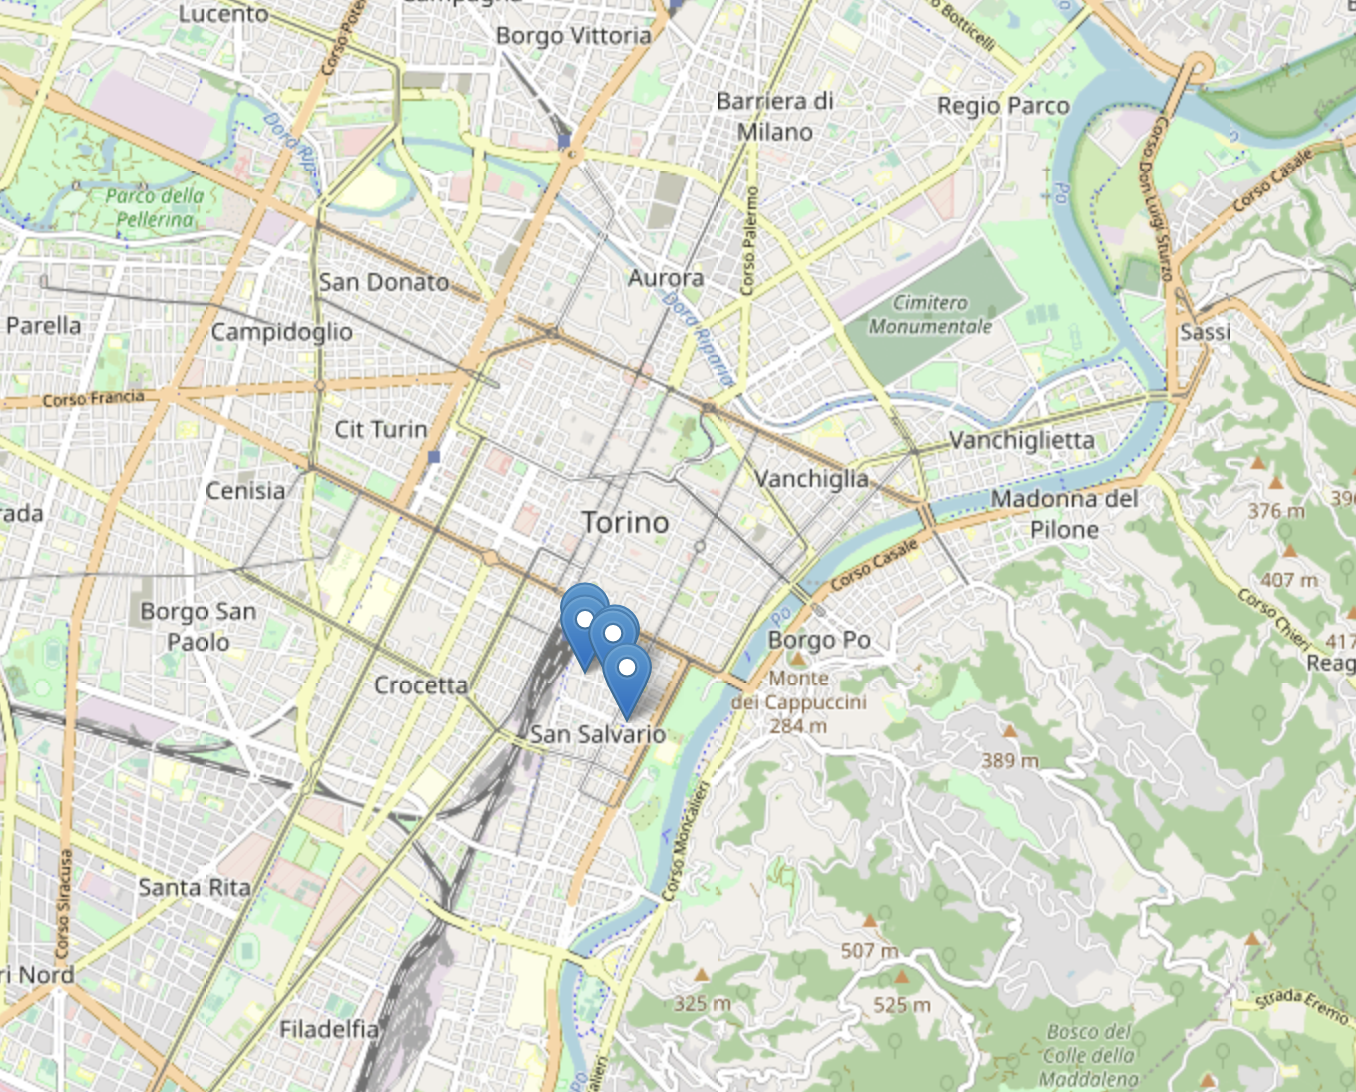

**Note** The location of sensors was optimized to cover all
significant feature of “Movida” area:
one in a very crowded square (S_03, not active in
daytime), three in narrow streets with pubs and
bars (S_01, S_04, S_05), one in a boulevard for
traffic noise measurement (S_06) and the last one
in a quieter area with no crowd and low traffic
(S_02), for global reference. The choice of points
of installation was driven also by the power
supply, so light poles, public offices and bike
sharing station where preferred.

Source: https://wdl-data.fra1.digitaloceanspaces.com/torino/120_Euronoise2018.pdf

In [4]:
df_wifi = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/WIFI%20Count.csv', sep=',')
df_wifi.head()

Time  No. of Visitors
0  2018-10-24 17:00               47
1  2018-10-24 18:00              155
2  2018-10-24 19:00              181
3  2018-10-24 20:00              211
4  2018-10-24 21:00              239

**Note** As you can see, from the data above, we can get an idea of the number of people outside at different hours.Wifi Information gives a detail idea about the number of visitors outside at a particular hour which has some impact on the noise.

In [5]:
df_sim_june = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/sim_count/SIM_count_04_100618.csv', 
                          sep=';', 
                          encoding='latin-1')
df_sim_june.head()

cluster               data_da                data_a  numero_presenze  \
0  Presenze  2018-06-10T21:00:00Z  2018-06-10T22:00:00Z             3278   
1  Presenze  2018-06-10T20:00:00Z  2018-06-10T21:00:00Z             3324   
2  Presenze  2018-06-10T19:00:00Z  2018-06-10T20:00:00Z             3318   
3  Presenze  2018-06-10T18:00:00Z  2018-06-10T19:00:00Z             3187   
4  Presenze  2018-06-10T17:00:00Z  2018-06-10T18:00:00Z             2980   

                               layer_id layer_nome  dettaglio(secondi)  
0  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1                3600  
1  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1                3600  
2  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1                3600  
3  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1                3600  
4  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1                3600

In [6]:
df_sim_jan = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/sim_count/SIM_count_15_210118.csv', 
                         sep=';', 
                         encoding='latin-1')
df_sim_jan.head()

cluster               data_da                data_a  numero_presenze  \
0  Presenze  2018-01-21T22:00:00Z  2018-01-21T23:00:00Z             3026   
1  Presenze  2018-01-21T21:00:00Z  2018-01-21T22:00:00Z             3088   
2  Presenze  2018-01-21T20:00:00Z  2018-01-21T21:00:00Z             3119   
3  Presenze  2018-01-21T19:00:00Z  2018-01-21T20:00:00Z             3114   
4  Presenze  2018-01-21T18:00:00Z  2018-01-21T19:00:00Z             2991   

                               layer_id layer_nome  dettaglio(secondi)  
0  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1                3600  
1  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1                3600  
2  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1                3600  
3  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1                3600  
4  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1                3600

In [7]:
df_sim_march = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/sim_count/SIM_count_19_250318.csv', 
                           sep=';', 
                           encoding='latin-1')
df_sim_march.head()

cluster               data_da                data_a  numero_presenze  \
0  Presenze  2018-03-25T21:00:00Z  2018-03-25T22:00:00Z             3267   
1  Presenze  2018-03-25T20:00:00Z  2018-03-25T21:00:00Z             3373   
2  Presenze  2018-03-25T19:00:00Z  2018-03-25T20:00:00Z             3410   
3  Presenze  2018-03-25T18:00:00Z  2018-03-25T19:00:00Z             3358   
4  Presenze  2018-03-25T17:00:00Z  2018-03-25T18:00:00Z             3229   

                               layer_id layer_nome  dettaglio(secondi)  
0  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1                3600  
1  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1                3600  
2  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1                3600  
3  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1                3600  
4  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1                3600

In [8]:
df_sim_all = pd.concat([df_sim_jan, df_sim_march, df_sim_june], axis=0)
df_sim_all.reset_index(inplace=True)
df_sim_all.head()

index   cluster               data_da                data_a  \
0      0  Presenze  2018-01-21T22:00:00Z  2018-01-21T23:00:00Z   
1      1  Presenze  2018-01-21T21:00:00Z  2018-01-21T22:00:00Z   
2      2  Presenze  2018-01-21T20:00:00Z  2018-01-21T21:00:00Z   
3      3  Presenze  2018-01-21T19:00:00Z  2018-01-21T20:00:00Z   
4      4  Presenze  2018-01-21T18:00:00Z  2018-01-21T19:00:00Z   

   numero_presenze                              layer_id layer_nome  \
0             3026  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1   
1             3088  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1   
2             3119  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1   
3             3114  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1   
4             2991  5491d6d2-0c9e-47b7-bfde-c84c632efacc     Area 1   

   dettaglio(secondi)  
0                3600  
1                3600  
2                3600  
3                3600  
4                3600

In [9]:
df_sim_all=df_sim_all.groupby(by='data_a').sum()
df_sim_all.head()

index  numero_presenze  dettaglio(secondi)
data_a                                                          
2018-01-15T00:00:00Z  28710            17827               64800
2018-01-15T01:00:00Z  28692            17640               64800
2018-01-15T02:00:00Z  28674            17476               64800
2018-01-15T03:00:00Z  28656            17340               64800
2018-01-15T04:00:00Z  28638            17215               64800

In [10]:
df_sim_all=df_sim_all.reset_index()
df_sim_all.head()

data_a  index  numero_presenze  dettaglio(secondi)
0  2018-01-15T00:00:00Z  28710            17827               64800
1  2018-01-15T01:00:00Z  28692            17640               64800
2  2018-01-15T02:00:00Z  28674            17476               64800
3  2018-01-15T03:00:00Z  28656            17340               64800
4  2018-01-15T04:00:00Z  28638            17215               64800

**Note** Another possibility to estimate the number of people outside at certain hours is the SIM card dataframes. What it highlights is the presence of certain SIM card users at different hours of the day. We have access to SIM card data of 2018 for January, March and June.

In [11]:
df_noise_2018 = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/noise_data/Noise_Data_2018.csv',
                            decimal=',')
df_noise_2018=df_noise_2018.drop(columns='Unnamed: 0')
df_noise_2018.astype('str')
df_noise_2018.head()

Data    Ora    C1  C2    C3  C4    C5
0  01-01-2018  00:00  68.7 NaN  76.0 NaN  66.6
1  01-01-2018  01:00  68.3 NaN  68.2 NaN  65.4
2  01-01-2018  02:00  59.8 NaN  64.4 NaN  64.4
3  01-01-2018  03:00  67.4 NaN  67.5 NaN  61.8
4  01-01-2018  04:00  68.0 NaN  64.5 NaN  60.5

In [12]:
df_noise_2018['date_hour'] = df_noise_2018['Data'] + ' ' + df_noise_2018['Ora']
df_noise_2018['date_hour'] = pd.to_datetime(df_noise_2018['date_hour'])
df_noise_2018.head(2)

Data    Ora    C1  C2    C3  C4    C5           date_hour
0  01-01-2018  00:00  68.7 NaN  76.0 NaN  66.6 2018-01-01 00:00:00
1  01-01-2018  01:00  68.3 NaN  68.2 NaN  65.4 2018-01-01 01:00:00

**Note** The noise data is records of noice measurements using 5 different sensors spread in the San Salvario region on an hourly basis. We will use this data as our target in our time series measurements. 

**Preprocessing Noise Data**


1.   TypeCasting the data values to required format (Converting data and Ora to Date and Hour format)
2.   TypeCastig the noise values
3.   Imputing the null values based on day and hour
4.   Considering the logarithmic mean of all noise reading at each day and hour





In [13]:
#Typecasting the data
df_noise_2018['Ora']=pd.to_datetime(df_noise_2018['Ora']).dt.hour        #Changing the hour format
df_noise_2018['Data']=pd.to_datetime(df_noise_2018['Data'])     #Changing the date format
df_noise_2018.head(2)

Data  Ora    C1  C2    C3  C4    C5           date_hour
0 2018-01-01    0  68.7 NaN  76.0 NaN  66.6 2018-01-01 00:00:00
1 2018-01-01    1  68.3 NaN  68.2 NaN  65.4 2018-01-01 01:00:00

In [14]:
#Conerting the noise reading to float values
df_noise_2018['C1']=df_noise_2018['C1'].apply(lambda x: float(x))
df_noise_2018['C2']=df_noise_2018['C2'].apply(lambda x: float(x))
df_noise_2018['C3']=df_noise_2018['C3'].apply(lambda x: float(x))
df_noise_2018['C4']=df_noise_2018['C4'].apply(lambda x: float(x))
df_noise_2018['C5']=df_noise_2018['C5'].apply(lambda x: float(x))

In [15]:
#Adding day value like Monday as 0, Tuseday as 1 etc to the noise data based on date
df_noise_2018['day']=df_noise_2018['Data'].dt.dayofweek

The missing values are filled with respective to particular day and hour. For instance to fill the null value of saturday at 1:00, mean of all the saturdays at 1:00 hour is considered

In [16]:
#Fillig the null values considering means on hourly basis
df_noise_2018["C1"] = df_noise_2018.groupby(["Ora",'day'])['C1'].transform(lambda x: x.fillna(round(x.mean(),1)))
df_noise_2018["C2"] = df_noise_2018.groupby(["Ora",'day'])['C2'].transform(lambda x: x.fillna(round(x.mean(),1)))
df_noise_2018["C3"] = df_noise_2018.groupby(["Ora",'day'])['C3'].transform(lambda x: x.fillna(round(x.mean(),1)))
df_noise_2018["C4"] = df_noise_2018.groupby(["Ora",'day'])['C4'].transform(lambda x: x.fillna(round(x.mean(),1)))
df_noise_2018["C5"] = df_noise_2018.groupby(["Ora",'day'])['C5'].transform(lambda x: x.fillna(round(x.mean(),1)))
#Let's Check if there are any null values after filling
df_noise_2018.isnull().sum()

Data         0
Ora          0
C1           0
C2           0
C3           0
C4           0
C5           0
date_hour    0
day          0
dtype: int64

Computing logarithimic mean of C1,C2,C3,C4,C5 (all sensors noise readings).

**Why logarithmic mean??**
Simple averaging can be produced will not represent the level of energy of a record. For example, 45, 46, 48, 43, 78, 79, 71, 33, 55 levels, the simple arithmetic average would be 55.3.

But the energy level of noise for 78, 79 and 71 is high compared to other values so this can be solved by considering the logarithmic average.

The steps involved in computing the logarithmic average include

1.   Divide each value by 10
2.   Apply anti log
3.   Add all the values
4.   Divide by total number of samples
5.   base 10 log the number and multiply it by 10




In [17]:
df_noise_2018['Log_Avg']=np.log10(((10**(df_noise_2018['C1']/10))+(10**(df_noise_2018['C2']/10))+(10**(df_noise_2018['C3']/10))+(10**(df_noise_2018['C4']/10))+(10**(df_noise_2018['C5']/10)))/5)*10
df_noise_2018.head(2)

Data  Ora    C1    C2    C3    C4    C5           date_hour  day  \
0 2018-01-01    0  68.7  56.6  76.0  58.8  66.6 2018-01-01 00:00:00    0   
1 2018-01-01    1  68.3  53.6  68.2  55.7  65.4 2018-01-01 01:00:00    0   

     Log_Avg  
0  70.253908  
1  65.424707

Complaints: 

We filtered the complaints data to the following misdemeanors which we believe are connected to noise emission:
- ```Rumori molesti``` - Loud noises
- ```Aggregazioni giovanili``` - Youth Gatherings
- ```Disturbi da locali``` - Local Disturbances
- ```Uso improprio parti comuni``` - Misuse of Common Goods

In [18]:
df_complaints = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/complaints_filtered.csv',
                            index_col=0)
df_complaints.head()

Sottocategoria Criminologica        Data
0                        Altro  2018-07-16
1                        Altro  2018-07-17
2                        Altro  2018-09-14
3                        Altro  2018-10-02
4                        Altro  2018-11-27

<br><br>
See details in [Appendix](#Weather Data)

In [19]:
df_weather = pd.read_csv("https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/all_weather.csv",
                         index_col=0)
df_weather.head()

time  temp     winds  rainfall_mm  snowfall_mm
0  2018-01-01 00:00:00  1.04  0.366667       -0.010     2.600000
1  2018-01-01 01:00:00  1.09  0.590000        0.009     2.600000
2  2018-01-01 02:00:00  1.05  0.450000        0.008     2.266667
3  2018-01-01 03:00:00  0.89  0.400000        0.006     2.266667
4  2018-01-01 04:00:00  0.73  0.780000       -0.011     2.300000

In [20]:
#List of holidays
df_holidays = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/holiday_updated.csv',
                          index_col=0)
df_holidays.head()

date_hour  isHoliday         Holiday
0  2018-01-01 00:00:00          1  New year's Day
1  2018-01-01 01:00:00          1  New year's Day
2  2018-01-01 02:00:00          1  New year's Day
3  2018-01-01 03:00:00          1  New year's Day
4  2018-01-01 04:00:00          1  New year's Day

We found that days of football matches with the local Team Juventus Turin and FC Torino might have an influence to the noise development on the sensors.

Thus, we added match fixtures over the year 2018 to the data set. We padded the match days from 15:00 to 9:00 of the next day of the match to have a stronger signal over the night of the match when noise is more likely to be emitted.

The steps followed for creating the matches data can be seen from **Appendix: Matches Data** [Link](#Matches Data) part. Due to covid there might be chances of more number of in house matches so we considered both the matches in house as well as the matches in match pad.


In [21]:
df_matches = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/matches_2018_home.csv',
                         index_col=0,
                         parse_dates=['Date'])
df_matches.head()

Date  is_match_pad  is_home_pad
0 2018-01-01 00:00:00           0.0          0.0
1 2018-01-01 01:00:00           0.0          0.0
2 2018-01-01 02:00:00           0.0          0.0
3 2018-01-01 03:00:00           0.0          0.0
4 2018-01-01 04:00:00           0.0          0.0

The count of open of Cafes, Restaurants and Bars are considered using the Opening Hours Data that we extracted from the Google Places API. The acquired data contains info of about 50 businesses in the surrounding which we consider representative for the model. The ```count``` column refers to the amount of businesses being open at a given time. The Code related to this can be found at **Appendix:Opening Hours Data**.

In [22]:
df_opening_hours = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/business_open_2018.csv',
                               index_col=0)
df_opening_hours.head()



hour  count
0  2018-01-01 00:00:00      5
1  2018-01-01 01:00:00      5
2  2018-01-01 02:00:00      2
3  2018-01-01 03:00:00      0
4  2018-01-01 04:00:00      0

In [23]:
df_transport=pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/transport_flow.csv')
df_transport.head()

dat_hr     n  flow_mean   flow_sd  flow_median  speed_mean  \
0  01-01-18 00:00   991   2297.135  1304.423         2085     369.392   
1  01-01-18 01:00  1163   4479.686  2634.671         4095     341.489   
2  01-01-18 02:00   965   3796.326  2292.005         3483     328.034   
3  01-01-18 03:00   949   2777.488  1622.614         2514     322.364   
4  01-01-18 04:00  1074   1987.818  1166.373         1824     342.330   

   speed_sd  speed_median  
0   135.967       341.945  
1   122.820       311.755  
2   114.294       294.730  
3   109.699       290.020  
4   124.187       311.785

**Merged**



We Merged all the dataframes that we considered which you can refer at Appendix: *Merging Data Frames* section

The datasets we considered include

1. Sensors Data (For Noise Raedings)
2. Wifi Data (For Analysing the no.of. people out side in an hour)
3. Transport Data (For Analysing the effect of cars on noise)
4. Matches Data   (For Analysing how the match days effect the noise, both inhouse and at ground)
5. Police Complaints Data (For Complaints at each hour)
6. Sim Data (For Analysing the presence of people in a particular area at particular hour)
7. Opening and Closing Hours (For taking business times)
8. Holidays Data (For analysing effect of holidays on Noise)
9. Weather Data  (For analysing effect of rainfall and temperature on noise)

In [24]:
# Merged Data Frame
df_final = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/final_df.csv',
                    index_col=0,
                    parse_dates=['date_hour'],
                    )
df_final.drop(columns=['C1','C2','C3','C4','C5','final_date','index','dat_hr','Day','Holiday'],inplace=True)
df_final.head()


Ora           date_hour  day    Log_Avg  No. of Visitors  numero_presenze  \
0    0 2018-01-01 00:00:00    0  70.253908              NaN              NaN   
1    1 2018-01-01 01:00:00    0  65.424707              NaN              NaN   
2    2 2018-01-01 02:00:00    0  61.332068              NaN              NaN   
3    3 2018-01-01 03:00:00    0  64.069742              NaN              NaN   
4    4 2018-01-01 04:00:00    0  63.175181              NaN              NaN   

   dettaglio(secondi)  temp     winds  rainfall_mm  ...  count_complaint  \
0                 NaN  1.04  0.366667       -0.010  ...              0.0   
1                 NaN  1.09  0.590000        0.009  ...              0.0   
2                 NaN  1.05  0.450000        0.008  ...              0.0   
3                 NaN  0.89  0.400000        0.006  ...              0.0   
4                 NaN  0.73  0.780000       -0.011  ...              0.0   

        n  flow_mean   flow_sd  flow_median  speed_mean  speed_sd  \
0   991.0   2297.135  1304.423       2085.0     369.392   135.967   
1  1163.0   4479.686  2634.671       4095.0     341.489   122.820   
2   965.0   3796.326  2292.005       3483.0     328.034   114.294   
3   949.0   2777.488  1622.614       2514.0     322.364   109.699   
4  1074.0   1987.818  1166.373       1824.0     342.330   124.187   

   speed_median      date  isHoliday  
0       341.945  01-01-18          0  
1       311.755  01-01-18          0  
2       294.730  01-01-18          0  
3       290.020  01-01-18          0  
4       311.785  01-01-18          0  

[5 rows x 25 columns]

# Data Exploration & Feature Selection

## Data Exploration

### Outliers as Categorical Feature

Since the police complaints for example do not provide an hourly granularity we decided to restructure the sensors data and count the amount of outliers per day. This is a good way to quantify the sensors data because the sensors data has high amplitudes. 

We assume that the amount of outliers in the noise data can be measured against other features, like: 
- Football matches in the city of Turin
- The count of police complaints
- The amount of Cafes, Restaurants and Bars opened at a given time

Let's start by defining the outliers: 

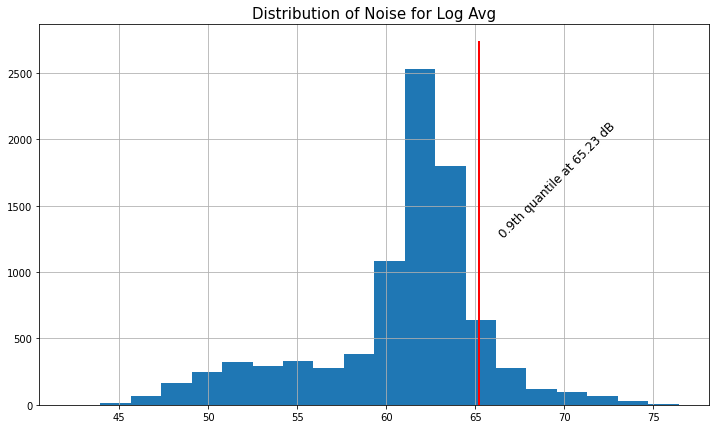

In [25]:
def plot_hist(df):    
    """
    returns histplot with labelling and title.
    """
    # plot distribution of noise
    plt.figure(figsize=(12,7))
    # histplot
    max_ = df.Log_Avg.value_counts(bins=20).max()
    df.Log_Avg.hist(bins=20)
    x=df.Log_Avg.quantile(.9)
    # line
    plt.plot([x,x], [0, max_+200], 'r', lw=2)
    # label
    plt.text(x=x+1, 
             y=max_/2, 
             s=f'0.9th quantile at {round(x,2)} dB', 
             size=12,
            rotation=45)
    plt.title('Distribution of Noise for Log Avg', size=15)
    plt.show()
    
# plot
plot_hist(df_final)

**Note**<br>
We decide to cut the df at the 0.9th quantile.

In [26]:
# split outliers
out = df_final.Log_Avg.quantile(.9)
df_final['is_outlier'] = df_final.Log_Avg.apply(lambda x: 1 if x > out else 0)
df_outliers = df_final.copy()[['date_hour', 'is_outlier', 'flow_mean']]

# df_outliers = df_final[df_final.is_outlier == 1]
# df_outliers = df_outliers[df_outliers.is_outlier == 1][['date_hour', 'is_outlier']]
df_outliers.head()

date_hour  is_outlier  flow_mean
0 2018-01-01 00:00:00           1   2297.135
1 2018-01-01 01:00:00           1   4479.686
2 2018-01-01 02:00:00           0   3796.326
3 2018-01-01 03:00:00           0   2777.488
4 2018-01-01 04:00:00           0   1987.818

#### Correlations on Daily Averages

In [27]:
# get date to index in filtered complaints
df_complaints['Data'] = pd.to_datetime(df_complaints.Data)
complaints_day_count = df_complaints.groupby('Data')\
                                            .count()\
                                            .rename(columns={'Sottocategoria Criminologica':
                                                            'complaint_count'})
# put in data series
r = pd.date_range('2018-01-01', '2018-12-31', freq='d')
complaints_fin = complaints_day_count.reindex(r).rename_axis('final_date').fillna(0)

# change date to normal day (without hours) at football matches
df_matches['day_date'] = df_matches.Date.apply(lambda x: x.floor('d'))
matches_daily = df_matches.groupby('day_date').max().drop(columns='Date') # catch the '1' or '0'

In [28]:
######## RESTRUCTURE DF #######
df_outliers['date_hour'] = pd.to_datetime(df_outliers.date_hour)
# change date to normal day (without hours)
df_outliers['day_date'] = df_outliers.date_hour.apply(lambda x: x.floor('d'))
df_outliers = df_outliers.groupby('day_date').agg({'is_outlier':'sum',
                                                   'flow_mean':'mean'})
df_outliers['is_weekend'] = df_outliers.index.map(lambda x: 1 if x.weekday() > 4 else 0)

df_outliers.head(8)

is_outlier    flow_mean  is_weekend
day_date                                       
2018-01-01           2  3139.315292           0
2018-01-02           0  6272.540500           0
2018-01-03           0  6152.465542           0
2018-01-04           0  4030.568750           0
2018-01-05           0  3525.837458           0
2018-01-06           1  6561.811000           1
2018-01-07           2  3806.351333           1
2018-01-08           6  5379.849500           0

In [29]:
# check correlations
corr_daily = df_outliers.join(complaints_fin).join(matches_daily).corr()
corr_daily

is_outlier  flow_mean  is_weekend  complaint_count  \
is_outlier         1.000000  -0.077130    0.443427        -0.165218   
flow_mean         -0.077130   1.000000   -0.413380         0.433276   
is_weekend         0.443427  -0.413380    1.000000        -0.588170   
complaint_count   -0.165218   0.433276   -0.588170         1.000000   
is_match_pad       0.243438  -0.175451    0.381141        -0.173886   
is_home_pad        0.150362  -0.118376    0.221326        -0.071103   

                 is_match_pad  is_home_pad  
is_outlier           0.243438     0.150362  
flow_mean           -0.175451    -0.118376  
is_weekend           0.381141     0.221326  
complaint_count     -0.173886    -0.071103  
is_match_pad         1.000000     0.651376  
is_home_pad          0.651376     1.000000

<AxesSubplot:>

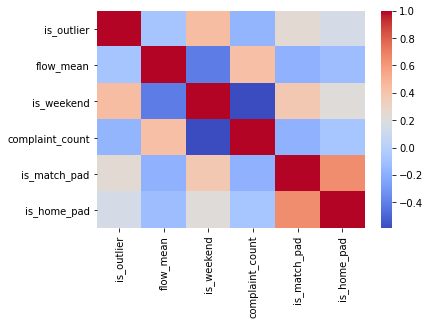

In [30]:
# plot correlations
sns.heatmap(corr_daily, cmap='coolwarm')

**Note**<br>
- Football matches correlate with high counts of outliers.
- Weekends signal high counts of noise outliers.
- Noise does not seem to be directly correlated to the complaints that we defined.

**Disclaimer**<br>
We chose not to include the police complaints or try to implement them as a target because our analysis didn't show correlation with the other features.  

In [34]:
px.scatter(df_outliers.drop(columns='flow_mean').join(complaints_fin).join(matches_daily),
          title='Outlier Count vs. Complaint Count')

**Note**<br>
- There is a seasonal 'bump' in September for noise and complaints (data set incomplete?)
- It is hard to see patterns between outliers and complaints. 
- The highest outlier on April 11th is the same date as match between Juventus & FC Turin. 

### General Correlations

#### Hourly Granularity

In [35]:
df_avg = df_final[['date_hour', 'Log_Avg', 'flow_mean']].set_index('date_hour')

In [36]:
# move dates to index
df_opening_hours['hour'] = pd.to_datetime(df_opening_hours.hour)
opening = df_opening_hours.set_index('hour').rename(columns={'count':
                                                              'opening_count'})
# move dates to index
matches = df_matches.set_index('Date')

In [37]:
# check correlation
corr_hourly = df_avg.join(matches).join(opening).corr()
corr_hourly

Log_Avg  flow_mean  is_match_pad  is_home_pad  opening_count
Log_Avg        1.000000   0.548538      0.009747    -0.000301       0.517871
flow_mean      0.548538   1.000000     -0.066383    -0.045414       0.649352
is_match_pad   0.009747  -0.066383      1.000000     0.687362      -0.064487
is_home_pad   -0.000301  -0.045414      0.687362     1.000000      -0.047748
opening_count  0.517871   0.649352     -0.064487    -0.047748       1.000000

<AxesSubplot:>

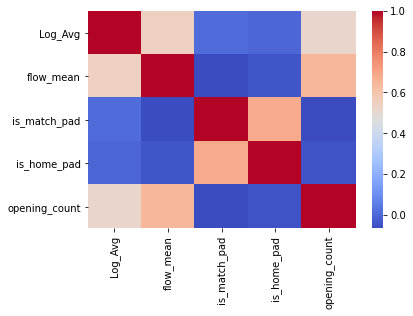

In [38]:
# plot heatmap
sns.heatmap(corr_hourly, cmap='coolwarm')

**Note**<br>
- The amount of Cafes, Bars and Restaurants being open correlates well with the recorded noise.
- When measuring matches on an hourly basis (15:00-09: of following day), there is little to no correlation between matches and noise. 
- Cars (```flow_mean```) have a considerable correlation with noise development.

#### Weekday Granularity

In [39]:
# Group Sensors by Weekday
df_avg['weekday'] = df_avg.index.map(lambda x: x.weekday())
df_avg_weekday = df_avg.groupby('weekday').mean()[['Log_Avg']]

# group opening hours
opening['weekday'] = opening.index.map(lambda x: x.weekday())
opening_weekday = opening.groupby('weekday').mean()

# group complaints
complaints_fin['weekday'] = complaints_fin.index.map(lambda x: x.weekday())
complaints_weekday = complaints_fin.groupby('weekday').mean()

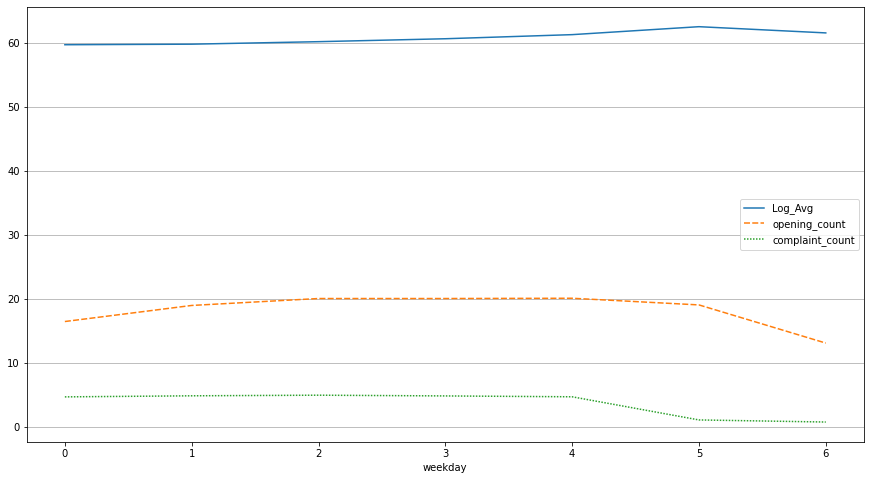

In [40]:
joint_weekday = df_avg_weekday.join(opening_weekday).join(complaints_weekday)

# plot
plt.figure(figsize=(15,8))
sns.lineplot(data=joint_weekday)
plt.grid(axis='y')

**Note**<br>
- There is an elbow visible starting at the weekend. 
- complaints generally decrease over the weekend. 
- The highest noise is emitted on Saturdays.

## Feature Selection

In [41]:
#Checking the propotion of null values in each feature
df_final.isnull().sum().sort_values(ascending=False)/len(df_final)

winds                 0.949543
numero_presenze       0.942580
dettaglio(secondi)    0.942580
No. of Visitors       0.812900
count_open            0.578539
count_close           0.513128
rainfall_mm           0.022374
snowfall_mm           0.022146
speed_median          0.002854
speed_mean            0.002854
speed_sd              0.002854
n                     0.002854
flow_mean             0.002854
flow_sd               0.002854
flow_median           0.002854
is_match_pad          0.002626
is_home_pad           0.002626
count_complaint       0.002626
date                  0.000000
isHoliday             0.000000
Ora                   0.000000
date_hour             0.000000
temp                  0.000000
Log_Avg               0.000000
day                   0.000000
is_outlier            0.000000
dtype: float64

**Note**<br>
The following features turn out to have too many null values: 
- ```winds```
- ```numero_presenze```
- ```dettaglio(secondi)```
- ```No. of Visitors```

We decided to remove them.

In [42]:
df_final.drop(columns=['winds','numero_presenze','dettaglio(secondi)','No. of Visitors'],inplace=True)

After the preprocessing there are still some of null values whose proportion is less than 50 percent. We are filling such null values using Simple imputer based on mean values

**Imputing**<br>


In [43]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean") # Instanciate a SimpleImputer object with strategy of choice

imputer.fit(df_final[['count_open','count_close','rainfall_mm','snowfall_mm','flow_median','flow_sd','flow_mean','n','speed_mean','speed_sd','speed_median','count_complaint','is_match_pad','is_home_pad']]) # Call the "fit" method on the object

df_final[['count_open','count_close','rainfall_mm','snowfall_mm','flow_median','flow_sd','flow_mean','n','speed_mean','speed_sd','speed_median','count_complaint','is_match_pad','is_home_pad']] = imputer.transform(df_final[['count_open','count_close','rainfall_mm','snowfall_mm','flow_median','flow_sd','flow_mean','n','speed_mean','speed_sd','speed_median','count_complaint','is_match_pad','is_home_pad']]) # Call the "transform" method on the object
imputer.statistics_ # The mean is stored in the transformer's memory

array([2.81408451e+01, 2.43756155e+01, 1.36995303e-02, 1.46451319e+01,
       4.93808517e+03, 3.35830969e+03, 5.56629703e+03, 9.69660332e+02,
       3.49491629e+02, 1.36403073e+02, 3.16182921e+02, 3.51379192e-02,
       1.04383656e-01, 5.21918279e-02])

In [44]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ora              8760 non-null   int64         
 1   date_hour        8760 non-null   datetime64[ns]
 2   day              8760 non-null   int64         
 3   Log_Avg          8760 non-null   float64       
 4   temp             8760 non-null   float64       
 5   rainfall_mm      8760 non-null   float64       
 6   snowfall_mm      8760 non-null   float64       
 7   is_match_pad     8760 non-null   float64       
 8   is_home_pad      8760 non-null   float64       
 9   count_close      8760 non-null   float64       
 10  count_open       8760 non-null   float64       
 11  count_complaint  8760 non-null   float64       
 12  n                8760 non-null   float64       
 13  flow_mean        8760 non-null   float64       
 14  flow_sd          8760 non-null   float64

Selecting the best features for model development is a crucial step. We are using univariate selection, Forward/backwards stepwise regression and correlation analysis for extracting the best features 

### Forward/backwards stepwise regression (for testing features that contribute best to the final output required)

In [45]:
df_feature_selection = df_final.copy()
X = df_feature_selection.drop(columns=['Log_Avg','date_hour','date'])
y = df_feature_selection['Log_Avg']

In [46]:
## feature importance
#RECURSIVE FEATURE ELIMINATION
#Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
names=pd.DataFrame(X.columns)

#use linear regression as the model
lin_reg = LinearRegression()

#This is to select 5 variables: can be changed and checked in model for accuracy
rfe_mod = RFE(lin_reg, 5, step=1) #RFECV(lin_reg, step=1, cv=5) 
myvalues=rfe_mod.fit(X,y) #to fit
myvalues.support_#The mask of selected features.
myvalues.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
rankings

/home/sisto/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



0
0    1
1    2
2    3
3    1
4    9
5    1
6    7
7    8
8   13
9    1
10  10
11  12
12  14
13  11
14   6
15   4
16   5
17  15
18   1

In [47]:
#Concat and name columns
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

#Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] < 5] 
print(most_important)

most_important['Rank'].count()

            Feature  Rank
0               Ora     1
1               day     2
2              temp     3
3       rainfall_mm     1
5      is_match_pad     1
9   count_complaint     1
15         speed_sd     4
18       is_outlier     1


8

The top ranked attributes that has greater impact on the noise are hour(time like 1:00,2:00 like that), Day(sunday or monday like that), rainfall_mm, is_match_pad (is the match going on at match pad), is_home_pad (is the match going on at home)

### Univariate Selection

In [48]:
#UNIVARIATE SELECTION
# Feature Extraction with Univariate Statistical Tests (f_regression)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.datasets import load_digits

# load data
names=pd.DataFrame(X.columns)

model = SelectKBest(score_func=f_regression, k=4)
results = model.fit(X, y)

#print (results.scores_)
#print (results.pvalues_)

results_df=pd.DataFrame(results.scores_)
#Concat and name columns
scored=pd.concat([names,results_df], axis=1)
scored.columns = ["Feature", "Score"]
scored.sort_values(by=['Score'],ascending=False)[1:]
#The higher the score, the more important the variable. 

/home/sisto/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning:

invalid value encountered in true_divide



Feature        Score
11        flow_mean  3740.820203
12          flow_sd  3529.063325
18       is_outlier  2695.082340
15         speed_sd  1314.487768
0               Ora  1314.085796
14       speed_mean  1233.628554
16     speed_median   803.721860
7       count_close   708.338203
1               day   150.151141
4       snowfall_mm   124.834451
9   count_complaint    94.320556
2              temp    93.651074
10                n    53.944131
8        count_open    22.473745
5      is_match_pad    13.988683
3       rainfall_mm    13.396048
6       is_home_pad     3.465901
17        isHoliday          NaN

From the univariate selection method we got some more features that effect the noise reading, they include flow_mean,flow_sd,speed_sd, Ora, speed_mean

In [49]:
#Let's Consider only the features having greater impact for modelling
df_model_data=df_final[['is_home_pad','flow_mean','flow_sd','speed_sd','Ora','speed_mean','Log_Avg','day','rainfall_mm','is_match_pad']]
df_model_data.head(4)

is_home_pad  flow_mean   flow_sd  speed_sd  Ora  speed_mean    Log_Avg  \
0          0.0   2297.135  1304.423   135.967    0     369.392  70.253908   
1          0.0   4479.686  2634.671   122.820    1     341.489  65.424707   
2          0.0   3796.326  2292.005   114.294    2     328.034  61.332068   
3          0.0   2777.488  1622.614   109.699    3     322.364  64.069742   

   day  rainfall_mm  is_match_pad  
0    0       -0.010           0.0  
1    0        0.009           0.0  
2    0        0.008           0.0  
3    0        0.006           0.0

## Correlation Analysis

Correlation analysis is a statistical evaluation technique used to study the strength of a relationship between two, numerically measured, continuous variables. So, we are using correlation matrix to select the best suitable features to be used for implementing the model

<AxesSubplot:>

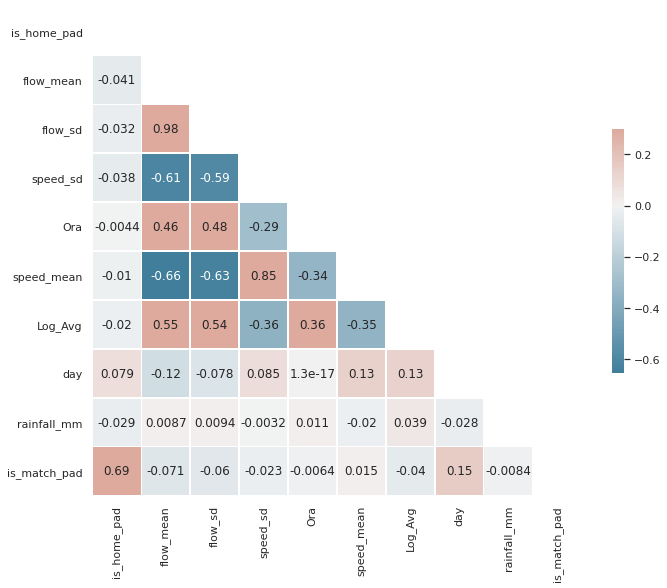

In [50]:
sns.set_theme(style="white")
correlation_mat = df_model_data.corr()
mask = np.triu(np.ones_like(correlation_mat , dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [51]:
correlation_mat['Log_Avg'].sort_values(ascending=False)

Log_Avg         1.000000
flow_mean       0.547078
flow_sd         0.535927
Ora             0.361204
day             0.129829
rainfall_mm     0.039080
is_home_pad    -0.019889
is_match_pad   -0.039934
speed_mean     -0.351378
speed_sd       -0.361252
Name: Log_Avg, dtype: float64

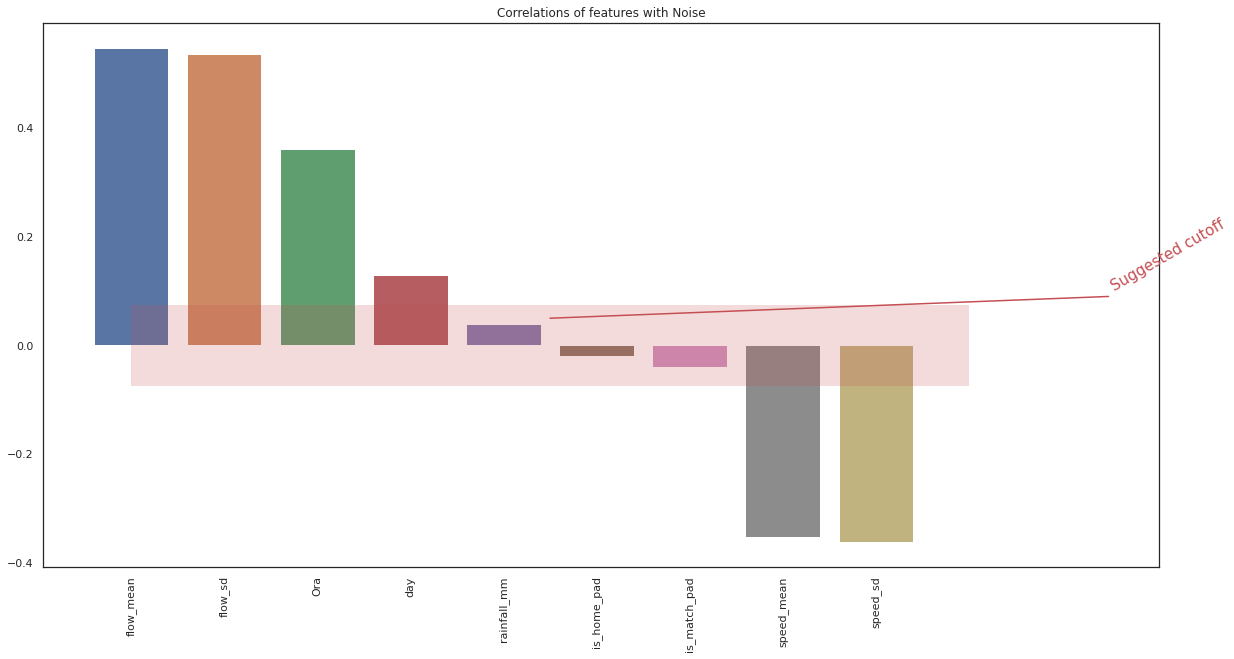

In [52]:
df = df_model_data.copy()

feats = df[[x for x in df.columns if 'feat_' in x]]
corr = df.drop(columns=['Log_Avg']).corrwith(df['Log_Avg'], 
                                              axis=0).sort_values(ascending=False)
plt.figure(figsize=(20,10))
# plot
ax = sns.barplot(x=corr.keys(), y=corr)
plt.xticks(rotation=90)

# rectangle
rect = patches.Rectangle((0, -.075), len(corr), .15, 
                         linewidth=0,  
                         facecolor='r',
                         alpha=.2)
ax.add_patch(rect)
# text
plt.title('Correlations of features with Noise')
plt.text(x=len(corr)/2+6, 
         y=.10, 
         s='Suggested cutoff',
         rotation=30,
         color='r',
         size=15)

# line
plt.plot((len(corr)/2, len(corr)/2+6), 
         (.05, .09),
        c='r')
plt.show()

In [53]:
# perform cutoff within  90 %
column_select = list(corr[~corr.between(-.2, .2)].keys())
column_select.append('Log_Avg')

In [54]:
#List of columns showing better correlation with the noise reading Log_Avg
column_select

['flow_mean', 'flow_sd', 'Ora', 'speed_mean', 'speed_sd', 'Log_Avg']

# Modelling

We considered several models for predicting the noise like regression models, deep learning models,ARIMA etc

We have added the code realted to all the models we used in the **Appendix**

After testing all the models we considered only few that have the greater impact, they include:

1. Baseline Model(Linear Regression) 
2. Moving Average
3. LSTM

## Final Dataframe Accessing 

Here we are considering the list of columns that we got after applying the univariate selection, forward and backward regression technique and the correlation analysis

In [55]:
data_model=df_model_data[column_select]
data_model.head()

flow_mean   flow_sd  Ora  speed_mean  speed_sd    Log_Avg
0   2297.135  1304.423    0     369.392   135.967  70.253908
1   4479.686  2634.671    1     341.489   122.820  65.424707
2   3796.326  2292.005    2     328.034   114.294  61.332068
3   2777.488  1622.614    3     322.364   109.699  64.069742
4   1987.818  1166.373    4     342.330   124.187  63.175181

## Modelling

### Getting Log_Avg values of previous times

In [56]:
def create_regressor_attributes(df, attribute, list_of_prev_t_instants) :
    
    list_of_prev_t_instants.sort()
    start = list_of_prev_t_instants[-1] 
    end = len(df)
    df['datetime'] = df.index
    df.reset_index(drop=True)

    df_copy = df[start:end]
    df_copy.reset_index(inplace=True, drop=True)

    for attribute in attribute :
            foobar = pd.DataFrame()

            for prev_t in list_of_prev_t_instants :
                new_col = pd.DataFrame(df[attribute].iloc[(start - prev_t) : (end - prev_t)])
                new_col.reset_index(drop=True, inplace=True)
                new_col.rename(columns={attribute : '{}_(t-{})'.format(attribute, prev_t)}, inplace=True)
                foobar = pd.concat([foobar, new_col], sort=False, axis=1)

            df_copy = pd.concat([df_copy, foobar], sort=False, axis=1)
            
    df_copy.set_index(['datetime'], drop=True, inplace=True)
    return df_copy

For Creating the regressor values we have consider same hour of previous days and also the previous hour of the same day

In [57]:
list_of_attributes = ['Log_Avg']

list_of_prev_t_instants = [1]
for i in range(24,361,24): #we can change this list as list of times with most impact
    list_of_prev_t_instants.append(i)



#list_of_prev_t_instants

In [58]:
df_new = create_regressor_attributes(data_model, list_of_attributes, list_of_prev_t_instants)
df_new.head()

<ipython-input-56-abfb20ebebb7>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



flow_mean  flow_sd  Ora  speed_mean  speed_sd    Log_Avg  \
datetime                                                             
360        1330.980  821.096    0     373.116   136.018  57.050511   
361         689.196  451.331    1     372.645   142.951  54.789326   
362         410.238  278.849    2     369.826   141.976  51.700077   
363         348.208  227.213    3     367.728   141.275  46.650952   
364         525.785  378.296    4     360.650   133.578  48.652227   

          Log_Avg_(t-1)  Log_Avg_(t-24)  Log_Avg_(t-48)  Log_Avg_(t-72)  ...  \
datetime                                                                 ...   
360           58.546485       57.278682       70.933958       69.539297  ...   
361           57.050511       54.522945       67.852881       68.170848  ...   
362           54.789326       51.655626       66.867685       67.163818  ...   
363           51.700077       46.925217       63.957624       61.779961  ...   
364           46.650952       49.532955       55.721568       55.108920  ...   

          Log_Avg_(t-144)  Log_Avg_(t-168)  Log_Avg_(t-192)  Log_Avg_(t-216)  \
datetime                                                                       
360             58.276322        62.883815        60.387011        67.848893   
361             56.031218        61.337339        56.538340        65.579769   
362             52.611915        59.617503        52.648808        64.692359   
363             50.882276        55.340699        49.331401        64.045979   
364             53.439118        51.598384        50.141191        59.614982   

          Log_Avg_(t-240)  Log_Avg_(t-264)  Log_Avg_(t-288)  Log_Avg_(t-312)  \
datetime                                                                       
360             64.186179        58.546722        63.873351        58.710065   
361             61.329600        57.279327        61.144561        56.154313   
362             63.385807        55.680879        59.315055        58.414597   
363             57.786678        51.877137        55.500505        55.128948   
364             54.071538        50.725884        50.490680        52.285777   

          Log_Avg_(t-336)  Log_Avg_(t-360)  
datetime                                    
360             57.592027        70.253908  
361             56.422202        65.424707  
362             52.124511        61.332068  
363             49.439248        64.069742  
364             49.730202        63.175181  

[5 rows x 22 columns]

<AxesSubplot:>

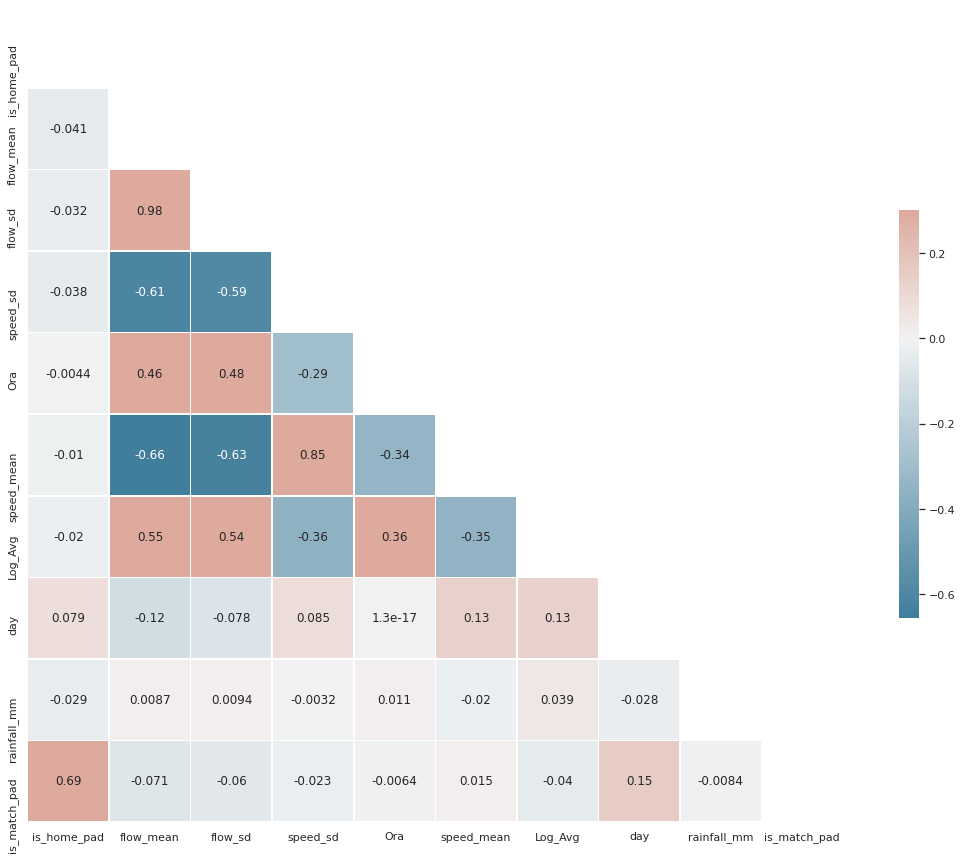

In [59]:
sns.set_theme(style="white")
correlation_mat_s = df_new.corr()
mask = np.triu(np.ones_like(correlation_mat , dtype=bool))
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [60]:
correlation_mat_s['Log_Avg'].sort_values()

speed_sd          -0.362075
speed_mean        -0.351085
Ora                0.361636
Log_Avg_(t-264)    0.473139
Log_Avg_(t-240)    0.474699
Log_Avg_(t-96)     0.476554
Log_Avg_(t-72)     0.476599
Log_Avg_(t-288)    0.502861
Log_Avg_(t-216)    0.504885
Log_Avg_(t-120)    0.509799
Log_Avg_(t-48)     0.510166
flow_sd            0.535892
flow_mean          0.547631
Log_Avg_(t-360)    0.689030
Log_Avg_(t-312)    0.695194
Log_Avg_(t-192)    0.703043
Log_Avg_(t-144)    0.710440
Log_Avg_(t-24)     0.715335
Log_Avg_(t-1)      0.817663
Log_Avg_(t-336)    0.884857
Log_Avg_(t-168)    0.892671
Log_Avg            1.000000
Name: Log_Avg, dtype: float64

As the correlation matrix suggests, there is high correlation between the previous times data on the current hour's noise value

**Note**: The top two highest correlation observed are the noise values from the same week day of previous weeks at the same hour  

## Training and Testing

Spliting the dataset into train, validation and test sets to evaluate the performance of the model

In [61]:
test_set_size = 0.05
valid_set_size= 0.05

df_copy = df_new.reset_index(drop=True)

df_test = df_copy.iloc[ int(np.floor(len(df_copy)*(1-test_set_size))) : ]
df_train_plus_valid = df_copy.iloc[ : int(np.floor(len(df_copy)*(1-test_set_size))) ]

df_train = df_train_plus_valid.iloc[ : int(np.floor(len(df_train_plus_valid)*(1-valid_set_size))) ]
df_valid = df_train_plus_valid.iloc[ int(np.floor(len(df_train_plus_valid)*(1-valid_set_size))) : ]


X_train, y_train = df_train.iloc[:, 1:], df_train.iloc[:, 0]
X_valid, y_valid = df_valid.iloc[:, 1:], df_valid.iloc[:, 0]
X_test, y_test = df_test.iloc[:, 1:], df_test.iloc[:, 0]

print('Shape of training inputs, training target:', X_train.shape, y_train.shape)
print('Shape of validation inputs, validation target:', X_valid.shape, y_valid.shape)
print('Shape of test inputs, test target:', X_test.shape, y_test.shape)

Shape of training inputs, training target: (7581, 21) (7581,)
Shape of validation inputs, validation target: (399, 21) (399,)
Shape of test inputs, test target: (420, 21) (420,)


### Linear Regression

In [71]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)
y_pred = Lin_reg.predict(X_test)
score = r2_score(y_test, y_pred)
print('R-squared score for the test set: ', round(score,4))

R-squared score for the test set:  0.9737


We have trained a linear regression model with the extracted features. According to the performance metric considered (R2 Score), the linear regression performance is very satisfactory with approximately 97.4% coefficient of determination

### Moving Average

Moving Average Smoothing is a technique applied to time series to remove the fine-grained variation between time steps. The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes.

<AxesSubplot:xlabel='datetime'>

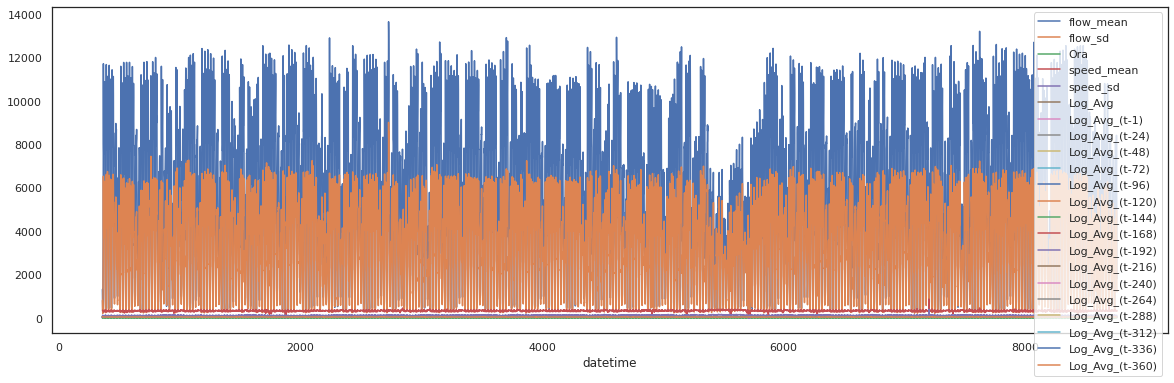

In [63]:
plt.rcParams["figure.figsize"] = (20,6)
df_new.plot()

     flow_mean      flow_sd  Ora  speed_mean    speed_sd    Log_Avg  datetime
2  3524.382333  2077.033000  1.0  346.305000  124.360333  65.670228       1.0
3  3684.500000  2183.096667  2.0  330.629000  115.604333  63.608839       2.0
4  2853.877333  1693.664000  3.0  330.909333  116.060000  62.858997       3.0
5  2041.229667  1189.952333  4.0  336.971333  120.632667  60.999306       4.0
6  1525.357333   916.519667  5.0  348.819000  130.338667  58.275637       5.0


<AxesSubplot:>

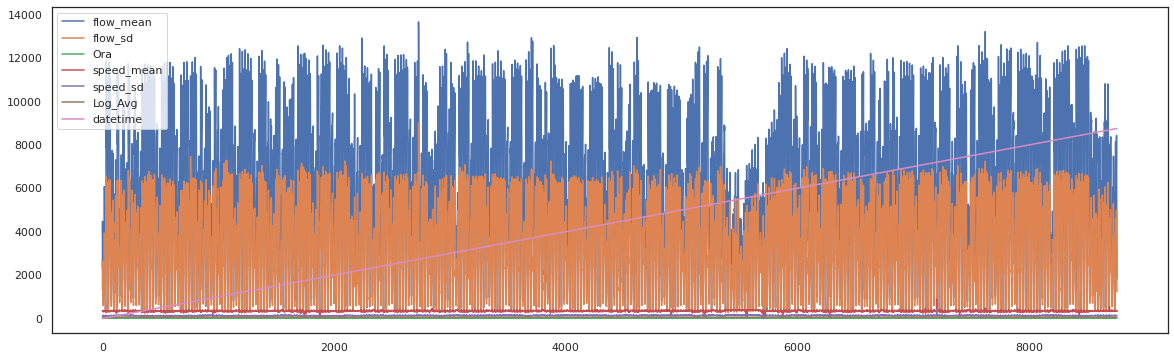

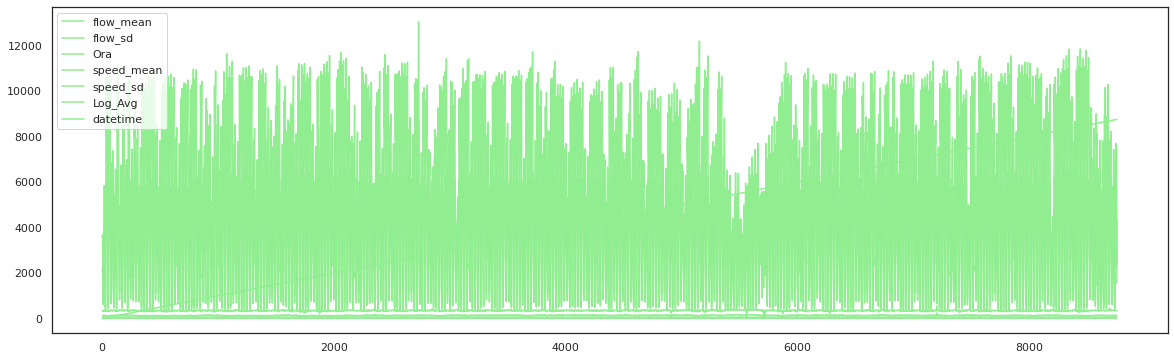

In [64]:
# Tail-rolling average transform
rolling = data_model.rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean.dropna(inplace= True)
print(rolling_mean.head())
# plot original and transformed dataset
data_model.plot()
rolling_mean.plot(color='lightgreen')

Test MSE: 17.794


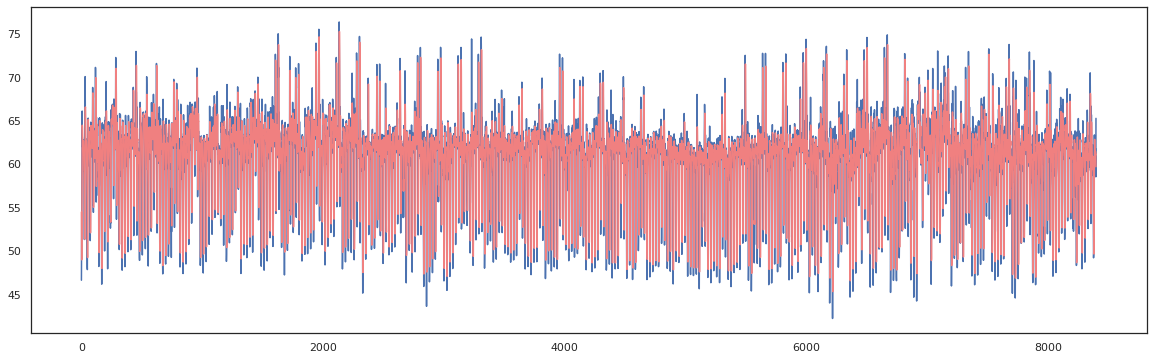

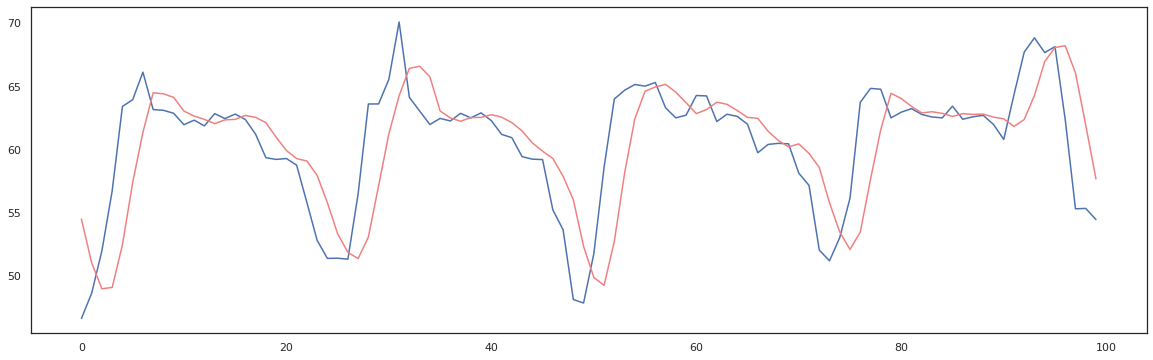

In [65]:
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
# prepare situation
X = df_new['Log_Avg'].values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='lightcoral')
pyplot.show()
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='lightcoral')
pyplot.show()

## LSTM

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (e.g. images), but also entire sequences of data (such as speech or video inputs).
LSTM models are able to store information over a period of time.
In order words, they have a memory capacity. Remember that LSTM stands for Long Short-Term Memory Model.

### Preprocessing for LSTM RNN

In [66]:
from sklearn.preprocessing import MinMaxScaler

Target_scaler = MinMaxScaler(feature_range=(0.01, 0.99))
Feature_scaler = MinMaxScaler(feature_range=(0.01, 0.99))

X_train_scaled = Feature_scaler.fit_transform(np.array(X_train))
X_valid_scaled = Feature_scaler.fit_transform(np.array(X_valid))
X_test_scaled = Feature_scaler.fit_transform(np.array(X_test))

y_train_scaled = Target_scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_valid_scaled = Target_scaler.fit_transform(np.array(y_valid).reshape(-1,1))
y_test_scaled = Target_scaler.fit_transform(np.array(y_test).reshape(-1,1))

In [67]:
X_train_lstm = np.reshape(X_train_scaled,(X_train_scaled.shape[0], X_train_scaled.shape[1],1) )
y_train_lstm = np.reshape(y_train_scaled, (y_train_scaled.shape[0]))

X_valid_lstm = np.reshape(X_valid_scaled,(X_valid_scaled.shape[0], X_valid_scaled.shape[1],1) )
y_valid_lstm = np.reshape(y_valid_scaled, (y_valid_scaled.shape[0]))

X_test_lstm = np.reshape(X_test_scaled,(X_test_scaled.shape[0], X_test_scaled.shape[1],1) )
y_test_lstm = np.reshape(y_test_scaled, (y_test_scaled.shape[0]))

In [68]:
model = Sequential()
model.add(LSTM(units= 4, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))

model.add(LSTM(units= 4, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units= 4, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=4))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(loss='mean_squared_error', optimizer='adam')
#model.summary()

**Note:** The recurrent neural network based on Long-short Term Memory is going to take approx 5 mins to run 

In [69]:
model.fit(x=X_train_lstm, y=y_train_lstm, batch_size=5, epochs=15, verbose=1, validation_data=(X_valid_lstm, y_valid_lstm), shuffle=True)

Epoch 1/15
1517/1517 [==============================] - 150s 89ms/step - loss: 0.0678 - val_loss: 0.0449
Epoch 2/15
  86/1517 [>.............................] - ETA: 2:02 - loss: 0.0297

KeyboardInterrupt: 

In [ ]:
loss_per_epoch = model.history.history['loss']
val_loss_per_epoch = model.history.history['val_loss']

y_axis = list(df_new.index)[-396:]
y_pred = model.predict(X_test_lstm)
y_pred_rescaled = Target_scaler.inverse_transform(y_pred)
y_test_rescaled =  Target_scaler.inverse_transform(y_test_scaled)
y_actual = pd.DataFrame(y_test_rescaled, columns=['Actual'])
y_hat = pd.DataFrame(y_pred_rescaled, columns=['Predicted'])
score = r2_score(y_test_rescaled, y_pred_rescaled)
print('R-squared score for the test set: ', round(score,4))

In [ ]:
import datetime
positions = [0,60,120,180,240,300,360]
selected_labels = []
for i in positions:
  selected_labels.append(y_axis[i])

plt.figure(figsize=(18, 10))
plt.plot(y_actual, linestyle='solid', color='r')
plt.plot(y_hat, linestyle='dashed', color='b')
plt.xticks(positions, selected_labels)
plt.legend(['Actual','Predicted'], loc='best', prop={'size': 14})
plt.title('SSTA in test', weight='bold', fontsize=16)
plt.grid(color = 'y', linewidth='0.5')
plt.show()

For predicting the noise information we require the noise data related to previous weeks. These models developed can be used further in predicting the future values if given with the previous weeks information.

# Solution

**Note** The other models could not provide better predictions than our Linear Regression Model which had the best score. Therefore, we can use this model to predict the noise on certain days using the features offered in the model such as flow_mean flow_sd Ora speed_mean speed_sd Log_Avg and historic Log_Avg.

## Analysing Solutions

As our solutions, we propose evaluating the impact of covid-related restrictions to measure how much it has reduced noise pollution.

For example, below are some of the policies that were implemented in 2021.

○ November 6th until April 25th always closed;

○ April 26th - May 17th: only terraces open, curfew 10 P.M. - 5 A.M.;

○ May 18th - June 6th: curfew 11 P.M. - 5 A.M.;

○ June 7th - June 13th: curfew 0 A.M. - 5 A.M.;

○ June 14th - June 20th: indoor and terraces open, curfew 0 A.M. - 5 A.M.,

○ June 21st: no curfew, alcohol cannot be served after 3 AM (National
Security Act).

In [129]:
# downloading 2021 noise data
df_noise_2021 = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/noise_data/san_salvario_2021.csv', skiprows= [0,1,2,3,4,5,6,7],
                            sep =';', parse_dates=True, dayfirst=False)
df_noise_2021.head()

Data    Ora    C1    C2    C3  C4  C5
0  01-01-2021  00:00  67,2  62,3  64,6 NaN NaN
1  01-01-2021  01:00  48,9  44,4  47,8 NaN NaN
2  01-01-2021  02:00  44,9  40,8  44,1 NaN NaN
3  01-01-2021  03:00  42,0  39,2  41,7 NaN NaN
4  01-01-2021  04:00  41,9  40,7  44,7 NaN NaN

In [130]:
# downloading 2018 noise data
df_noise_2018 = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/noise_data/Noise_Data_2018.csv')
df_noise_2018=df_noise_2018.drop(columns='Unnamed: 0')
df_noise_2018.head()

Data    Ora    C1   C2    C3   C4    C5
0  01-01-2018  00:00  68,7  NaN  76,0  NaN  66,6
1  01-01-2018  01:00  68,3  NaN  68,2  NaN  65,4
2  01-01-2018  02:00  59,8  NaN  64,4  NaN  64,4
3  01-01-2018  03:00  67,4  NaN  67,5  NaN  61,8
4  01-01-2018  04:00  68,0  NaN  64,5  NaN  60,5

In [131]:
# given that for 2021 noise data, two sensors were inactive, we took the log average of the first 3 sensors for both 2018 & 2021
def clean_noise(df):
    df = df.drop(columns=['C4','C5'])
    df['date_hour'] = df['Data'] + ' ' + df['Ora']
    df['date_hour'] = pd.to_datetime(df['date_hour'])
    
    #Typecasting the data
    df['Ora']=pd.to_datetime(df['Ora']).dt.hour        #Changing the hour format
    df['Data']=pd.to_datetime(df['Data'])     #Changing the date format
    
    #Converting the noise readings into decimal format
    df['C1']=df['C1'].apply(lambda x: str(x).replace(',','.'))
    df['C2']=df['C2'].apply(lambda x: str(x).replace(',','.'))
    df['C3']=df['C3'].apply(lambda x: str(x).replace(',','.'))
    
    #Conerting the noise reading to float values
    df['C1']=df['C1'].apply(lambda x: float(x))
    df['C2']=df['C2'].apply(lambda x: float(x))
    df['C3']=df['C3'].apply(lambda x: float(x))

    #Adding day value like Monday as 0, Tuseday as 1 etc to the noise data based on date
    df['day']=df['Data'].dt.dayofweek
    
    #Fillig the null values considering means on hourly basis
    df["C1"] = df.groupby(["Ora",'day'])['C1'].transform(lambda x: x.fillna(round(x.mean(),1)))
    df["C2"] = df.groupby(["Ora",'day'])['C2'].transform(lambda x: x.fillna(round(x.mean(),1)))
    df["C3"] = df.groupby(["Ora",'day'])['C3'].transform(lambda x: x.fillna(round(x.mean(),1)))
    df['Log_Avg']=np.log10(((10**(df['C1']/10))+(10**(df['C2']/10))+(10**(df['C3']/10)))/5)*10
    
    return df

In [132]:
# cleaning data through function
df_noise_2018_cleaned = clean_noise(df_noise_2018)

In [133]:
df_noise_2018_cleaned = df_noise_2018_cleaned.iloc[:4152,:]
df_noise_2018_cleaned.head()

Data  Ora    C1    C2    C3           date_hour  day    Log_Avg
0 2018-01-01    0  68.7  56.6  76.0 2018-01-01 00:00:00    0  69.793745
1 2018-01-01    1  68.3  53.6  68.2 2018-01-01 01:00:00    0  64.344683
2 2018-01-01    2  59.8  51.2  64.4 2018-01-01 02:00:00    0  58.854796
3 2018-01-01    3  67.4  47.5  67.5 2018-01-01 03:00:00    0  63.492797
4 2018-01-01    4  68.0  47.6  64.5 2018-01-01 04:00:00    0  62.641328

In [134]:
# cleaning data through function
df_noise_2021_cleaned = clean_noise(df_noise_2021)

In [135]:
df_noise_2021_cleaned.head()

Data  Ora    C1    C2    C3           date_hour  day    Log_Avg
0 2021-01-01    0  67.2  62.3  64.6 2021-01-01 00:00:00    4  62.935990
1 2021-01-01    1  48.9  44.4  47.8 2021-01-01 01:00:00    4  45.196258
2 2021-01-01    2  44.9  40.8  44.1 2021-01-01 02:00:00    4  41.375412
3 2021-01-01    3  42.0  39.2  41.7 2021-01-01 03:00:00    4  38.916228
4 2021-01-01    4  41.9  40.7  44.7 2021-01-01 04:00:00    4  40.549900

In [136]:
# function to get time-series ready
# return two dataframes one with hourly rate and one with daily rate
def getting_ts_read(df):
    df_hourly = df[['date_hour','Log_Avg']]
    df_hourly.index = pd.date_range('2021-01-01', '2021-06-23', freq='1H', closed='left')
    df_hourly = df_hourly.drop(columns= 'date_hour')
    df_daily = df_hourly.reset_index()
    df_daily['date'] = df_daily['index'].dt.date
    df_daily = df_daily[['Log_Avg', 'date']].groupby('date').mean()
    return df_hourly, df_daily

In [137]:
# assigning two new dateframes for 2021
df_ts_2021_hourly, df_ts_2021_daily = getting_ts_read(df_noise_2021_cleaned)

In [138]:
df_ts_2021_hourly.head()

Log_Avg
2021-01-01 00:00:00  62.935990
2021-01-01 01:00:00  45.196258
2021-01-01 02:00:00  41.375412
2021-01-01 03:00:00  38.916228
2021-01-01 04:00:00  40.549900

In [139]:
df_ts_2021_daily.head()

Log_Avg
date                 
2021-01-01  50.436783
2021-01-02  54.384878
2021-01-03  52.640073
2021-01-04  53.322517
2021-01-05  51.774899

In [140]:
# same here
df_ts_2018_hourly, df_ts_2018_daily = getting_ts_read(df_noise_2018_cleaned)

In [141]:
df_ts_2018_daily

Log_Avg
date                 
2021-01-01  59.127916
2021-01-02  56.961058
2021-01-03  56.647503
2021-01-04  57.664271
2021-01-05  57.583069
...               ...
2021-06-18  56.664287
2021-06-19  56.713895
2021-06-20  56.986116
2021-06-21  57.779084
2021-06-22  57.697584

[173 rows x 1 columns]

In [142]:
df_ts_2018_hourly

Log_Avg
2021-01-01 00:00:00  69.793745
2021-01-01 01:00:00  64.344683
2021-01-01 02:00:00  58.854796
2021-01-01 03:00:00  63.492797
2021-01-01 04:00:00  62.641328
...                        ...
2021-06-22 19:00:00  58.790722
2021-06-22 20:00:00  58.034122
2021-06-22 21:00:00  60.114085
2021-06-22 22:00:00  62.553966
2021-06-22 23:00:00  65.374703

[4152 rows x 1 columns]

In [143]:
# adding 2018 and 2021 on same month/day/time 
df_hourly = pd.concat([df_ts_2018_hourly, df_ts_2021_hourly], axis=1)
df_hourly.columns = ['log_avg_2018', 'log_avg_2021']
df_hourly.head()

log_avg_2018  log_avg_2021
2021-01-01 00:00:00     69.793745     62.935990
2021-01-01 01:00:00     64.344683     45.196258
2021-01-01 02:00:00     58.854796     41.375412
2021-01-01 03:00:00     63.492797     38.916228
2021-01-01 04:00:00     62.641328     40.549900

In [144]:
df_hourly['diff_noise'] = df_hourly['log_avg_2018'] - df_hourly['log_avg_2021']

In [145]:
# adding 2018 and 2021 on same month/day/time 
df_daily = pd.concat([df_ts_2018_daily, df_ts_2021_daily], axis=1)
df_daily.columns = ['log_avg_2018', 'log_avg_2021']
df_daily.head()

log_avg_2018  log_avg_2021
date                                  
2021-01-01     59.127916     50.436783
2021-01-02     56.961058     54.384878
2021-01-03     56.647503     52.640073
2021-01-04     57.664271     53.322517
2021-01-05     57.583069     51.774899

In [146]:
# looking at the difference in noise between 2018 and 2021 
df_daily['diff_noise'] = df_daily['log_avg_2018'] - df_daily['log_avg_2021']

In [147]:
fig = px.line(df_daily)
fig.add_vline(x='2021-04-25')
fig.add_vline(x='2021-05-18')
fig.add_vline(x='2021-06-7')
fig.add_vline(x='2021-06-14')
fig.add_vline(x='2021-06-21')

**Note** As we can see from the graph, as the restrictions are lifted, the difference between the log_avg noise in 2018 and 2021 falls and has reached almost 0 in recent days.

In [148]:
fig = px.line(df_daily['diff_noise'])
fig.add_vline(x='2021-04-25')
fig.add_vline(x='2021-05-18')
fig.add_vline(x='2021-06-7')
fig.add_vline(x='2021-06-14')
fig.add_vline(x='2021-06-21')

## Impact of Night Restrictions on Noise 

In order to measure the impact of imputing certain policies or restriction on days that are predicted to be noisy, the governmetn could implement some of the below restrictions. We have analyzed based on the mean difference over the periods, the reduction of noise it has brought to the area. 

### November 6th until April 25th always closed

In [149]:
start_data = dt.date(2021,1,1)
end_data = dt.date(2021,4,25)

In [150]:
df_daily_closed = df_daily[(df_daily.index >= start_data) & (df_daily.index <= end_data )]
df_daily_closed.mean() #reduction of 5.9 decibels following restriction

log_avg_2018    58.318087
log_avg_2021    52.460859
diff_noise       5.857228
dtype: float64

### April 26th - May 17th: only terraces open, curfew 10 P.M. - 5 A.M.

In [151]:
start_data = dt.date(2021,4,26)
end_data = dt.date(2021,5,17)

In [152]:
df_daily_curfew_1 = df_daily[(df_daily.index >= start_data) & (df_daily.index <= end_data )]
df_daily_curfew_1.mean() # reduction of 3 decibels with curfew in place

log_avg_2018    57.939604
log_avg_2021    54.874651
diff_noise       3.064954
dtype: float64

### May 18th - June 6th: curfew 11 P.M. - 5 A.M

In [153]:
start_data = dt.date(2021,5,18)
end_data = dt.date(2021,6,6)

In [154]:
df_daily_curfew_2 = df_daily[(df_daily.index >= start_data) & (df_daily.index <= end_data )]
df_daily_curfew_2.mean() # reduction of 1 decibel

log_avg_2018    58.002339
log_avg_2021    56.923218
diff_noise       1.079121
dtype: float64

### June 7th - June 13th: curfew 0 A.M. - 5 A.M.

In [155]:
start_data = dt.date(2021,6,7)
end_data = dt.date(2021,6,13)

In [156]:
df_daily_curfew_3 = df_daily[(df_daily.index >= start_data) & (df_daily.index <= end_data )]
df_daily_curfew_3.mean() # reduction of just below 0.9 decibel

log_avg_2018    57.711706
log_avg_2021    56.830230
diff_noise       0.881476
dtype: float64

### June 14th - June 20th: indoor and terraces open, curfew 0 A.M. - 5 A.M.

In [157]:
start_data = dt.date(2021,6,14)
end_data = dt.date(2021,6,20)

In [158]:
df_daily_curfew_4 = df_daily[(df_daily.index >= start_data) & (df_daily.index <= end_data )]
df_daily_curfew_4.mean() # almost no reduction

log_avg_2018    57.594346
log_avg_2021    57.363271
diff_noise       0.231074
dtype: float64

### June 21st: no curfew, alcohol cannot be served after 3 AM (National Security Act)

In [159]:
start_data = dt.date(2021,6,21) #not enough data to draw significant conclusion
# weekdays

In [160]:
df_daily_curfew_5 = df_daily[(df_daily.index >= start_data)]
df_daily_curfew_5.mean() # reduction is large here but due to a lack of data

log_avg_2018    57.738334
log_avg_2021    54.770855
diff_noise       2.967479
dtype: float64

**Outcome** 

In terms of measurement, we can assume that the potential social impacts of our solutions will depend on the type of restriction implemented and are represented by the average reduction in decibels following their implementation.

# Conclusions & Future Work

Ultimately we have offered a variety of different solutions based on various covid-restrictions implemented in 2021. They are effective in reducing noise as we have seen, however they are also extremely drastic. 

The city needs to take into account various stakeholders in its policy development including bars and restaurants as well as the population wellbeing. There is a fine line between reducing noise pollution and forbiding people to go out. 

Our exploratory data analysis has shown that there can be connections between football matches or business opening hours and peaks of noise in the measured area. However, traffic data seems to give a very accurate signal to regular noise emissions.

## Future Work

In terms of data, we would have wished to have more complete data on SIM, WiFi as well as Police Complaints. The problem with police complaints data was that there were few observations with hours included. This was a challenge for us as we had a hourly level of granularity for our time series.

# Appendix

**NOTE**

Appendix will not necessarily run given that we have used API keys to access some of our external data. Please don't judge.

## Weather Data

### Data

In [161]:
weather = pd.read_csv('raw_data/weather/weather_1.csv',
#                       nrows=1000, #rm later
                      sep=';',
#                       decimal=',',
                      skiprows=4,
#                       parse_dates=[[0, 1]],
#                       dayfirst=True,
                      header=0,
                      names=['date', 'hour', 'rainfall_mm', 'snowfall_mm'],
                     )

# workaround for hour concat issue
weather['date'] = pd.to_datetime(weather['date'], format='%d-%m-%Y', errors='coerce')
weather['date_hour'] = weather.apply(lambda x: pd.to_datetime(str(x.date) + ' ' + str(x.hour), errors='coerce'), axis=1)

# workaround for decimal issue
weather['rainfall_mm'] = weather.rainfall_mm.apply(lambda x: str(x).replace(',','.'))
weather['snowfall_mm'] = weather.snowfall_mm.apply(lambda x: str(x).replace(',','.'))

FileNotFoundError: [Errno 2] No such file or directory: 'raw_data/weather/weather_1.csv'

In [ ]:
weather2 = pd.read_csv('raw_data/weather/weather_2.csv', 
                 sep=';', 
                 skiprows=4, 
                 header=0, 
#                  decimal=',',
#                 converters={2:lambda x: x.replace(',', '.')},
#                 parse_dates=[[0, 1]],
                names=['date', 'hour', 'winds'],
                na_values={2:'',
                            3:''},
                dayfirst=True,
                )
# workaround for hour concat issue
weather2['date'] = pd.to_datetime(weather2['date'], format='%d-%m-%Y', errors='coerce')
weather2['date_hour'] = weather2.apply(lambda x: pd.to_datetime(str(x.date) + ' ' + str(x.hour), errors='coerce'), axis=1)

weather2['winds'] = weather2.winds.apply(lambda x: str(x).replace(',','.'))

In [ ]:
# weather['date_hour'] = pd.to_datetime(weather['date_hour'], errors='coerce')
weather_1 = weather.dropna(subset=['date_hour'])

# weather2['date_hour'] = pd.to_datetime(weather2['date_hour'], errors='coerce')
weather_2 = weather2.dropna(subset=['date_hour'])

In [ ]:
merged_weather = weather_2.merge(weather_1,
                                right_on='date_hour',
                                left_on='date_hour',
                                )

In [ ]:
merged_weather.sort_values(by='date_hour').tail()
merged_weather['hourly_date'] = merged_weather.date_hour.apply(lambda x: x.floor('h'))

In [ ]:
merged_weather = merged_weather.astype({'winds': float,
                      'rainfall_mm':float,
                      'snowfall_mm':float})

In [ ]:
hourly_weather = merged_weather.groupby('hourly_date').mean()

In [ ]:
hourly_weather.info()

In [ ]:
hourly_weather.to_csv('hourly_weather.csv')

In [ ]:
hourly_weather.head()

### Open Weather Map

In [ ]:
# API KEY
load_dotenv(find_dotenv())
OWM_API = os.environ.get("OWM_API")

In [ ]:
# init time range
range_2019 = pd.DataFrame(pd.date_range('2016-06-01', '2021-06-12', freq='h'), columns=['hour'])
range_2019.tail().hour

In [ ]:
req = 'http://history.openweathermap.org/data/2.5/history/wdl'
start = range_2019.hour.min().value
inter = range_2019.hour.max().value
end = range_2019.hour.max().value
# tail1 = tail.min().value
# tail2 = tail.max().value
params = {
    'id':'3165524', # ID of Turin
    'type':'hour',
    'start':str(start)[:10], # unix time
    'end':str(end)[:10],
    'appid': OWM_API
}

r = requests.get(req, params=params)


# with open('data/weather.txt', 'w') as outfile:
#     json.dump(r.json(), outfile)
    
weather = r.json()
lst = weather.get('list')
dct = {x.get('dt'):x.get('weather')[0].get('main') for x in lst}
weather_df = pd.DataFrame.from_dict(dct, 
                                    orient='index', 
                                    columns=['weather']).reset_index().rename(columns={'index':'time'})
weather_df['rain'] = weather_df.weather == 'Rain'

In [ ]:
lst = weather.get('list')
dct = {x.get('dt'):x.get('main').get('temp') for x in lst}

In [ ]:
weather_df = pd.DataFrame.from_dict(dct, 
                                    orient='index', 
                                    columns=['temp']).reset_index().rename(columns={'index':'time'})
weather_df['temp'] = weather_df.temp-273.15
weather_df['time'] = pd.to_datetime(weather_df.time, unit='s')

In [ ]:
merge_all = weather_df.merge(hourly_weather, left_on='time', right_index=True)

In [ ]:
merge_all.to_csv('all_weather.csv')

## Matches Data

In [ ]:
# API KEY
load_dotenv(find_dotenv())
FOOTBALL = os.environ.get("FOOTBALL")

In [ ]:
# headers = {'X-Auth-Token': FOOTBALL}
# url = 'https://api.football-data.org/v2/matches'
# params = {'dateFrom': '2018-04-14',
#          'dateTo': '2018-04-16'}
# r = requests.get(url, headers=headers, params=params)
# r.json()

In [ ]:
root = 'raw_data/football/'
dfs = []
for i in os.listdir(root):
    if '.csv' in i:
        df = pd.read_csv(root+i)
        dfs.append(df)

In [ ]:
# filter all by juve
juve1 = dfs[0][(dfs[0]['HomeTeam'] == 'Juventus') \
              | (dfs[0]['AwayTeam'] == 'Juventus')]['Date']
juve1 = pd.to_datetime(juve1, format='%d/%m/%Y')

juve2 = dfs[1][(dfs[1]['Home Team'] == 'Juventus') \
               | (dfs[1]['Away Team'] == 'Juventus')]['Date']
juve2 = pd.to_datetime(juve2.apply(lambda x: x[:10]), format="%d/%m/%Y")

juve3 = dfs[2][(dfs[2]['HomeTeam'] == 'Juventus') \
              | (dfs[2]['AwayTeam'] == 'Juventus')]['Date']
juve3 = pd.to_datetime(juve3, format='%d/%m/%y')

juve4 = dfs[3][(dfs[3]['Home Team'] == 'Juventus') \
               | (dfs[3]['Away Team'] == 'Juventus')]['Date']
juve4 = pd.to_datetime(juve4.apply(lambda x: x[:10]), format="%d/%m/%Y")

In [ ]:
# concat all dates
all_concat = pd.DataFrame(pd.concat([juve1, juve2, juve3, juve4]))
# all_concat['Date'] = pd.to_datetime(all_concat.Date)
all_concat['is_match'] = 1

In [ ]:
all_concat.sort_values(by='Date')

In [ ]:
# get all 2018 matches
all_concat_2018 = all_concat[(all_concat.Date > '01-01-2018') \
                            & (all_concat.Date < '2018-12-31')]

In [ ]:
# put in 2018 time series
r = pd.date_range('2018-01-01', '2018-12-31', freq='h')
matches = all_concat_2018.set_index('Date').reindex(r).rename_axis('Date').reset_index()

In [ ]:
matches.head()

In [ ]:
matches.to_csv('raw_data/football/matches_2018.csv')

## Opening Hours Data

This part is a bit messy, so we will explain: 
We used the ```nearbysearch``` [Link](https://developers.google.com/maps/documentation/places/web-service/search#PlaceSearchRequests) to get all the ```bars``` and ```restaurants``` business hours. 

Then we fetch the unique id ```reference``` from the list of businesses and run it through the ```place_details``` API [Link](https://developers.google.com/maps/documentation/places/web-service/details)

From there we extract all the ```open``` (time-)elements and ```close``` (time-)elements and stack them in a dataframe divided by days of the week (0-6). 

In the end we merge the findings with an empty time series of 2018 with an 'hourly' sequence. 


In [ ]:
# API KEY
load_dotenv(find_dotenv())
GOOGLE = os.environ.get("GOOGLE")

In [ ]:
# first find all bars

url = 'https://maps.googleapis.com/maps/api/place/nearbysearch/json'
params = {            
            'location':'45.05917,7.67899', #sensor
            'radius':'200',
            'type':'restaurant',
            'key':GOOGLE,
            'next_page_token':'Aap_uED24ODLIlOhPdAHG7xFrCg_OrsQ_jAruvTm3QSG4Qbnp5Q85Aa4K7ar-QgnGI7Xnl1epc9YIEj17piMfVpFUxQysBwi8XTzdWbtl6IBGKTKQwV_kxhaAUWr8JG6XVo-BVKHd8NJUwiTP-_uQvkKxc5vLZ4-v6T8ZBuS42zw5DE1L2KgNPCbm86EsPhPYOj8L1MXTRdEm_GhmQSdOt8nDxG4gKkbxiXvmHNTmuBLavqN-VrbpkRBBoVZz_t2P53_ShPgndMEwlt55EYlZHCYK2gHymy9WJjMjKn3VzS6CfcTQJ-TjgsxsrRjSqNXV4T5i2qusSJ__gsam11RBY8XRADB31i-ec_wYCh1529gNKKy9tdQbidVaQjAI72wQ-7yzTZXGzxpz8ob_DHkdVdyJLxijWoHqsXY7oQM-W3Db0u08SHwaooMyb3Da9Ij'
         } 

r = requests.get(url, params=params)
r.json()

In [ ]:
results = r.json().get('results')
results2 = r.json().get('results')
results3 = r.json().get('results')
results4 = r.json().get('results')
results5 = r.json().get('results')
results6 = r.json().get('results')

In [ ]:
bars = results + results2 + results3 + results4 + results5 + results6
restaurants = results + results2 + results3 + results4 + results5 + results6
len(restaurants)

In [ ]:
# get specific opening hrs from fetched bars/restaurants
url = 'https://maps.googleapis.com/maps/api/place/details/json'
params = {
    'key':GOOGLE,
    'fields':'opening_hours'
         }
opening_hrs = []
for bar in restaurants:
    reference = bar.get('reference')
    params['place_id'] = reference
    r = requests.get(url, params=params)
    opening_hrs.append(r)

In [ ]:
contents_hrs = [r.json() for r in opening_hrs]
periods = []
for x in contents_hrs:
    try:
        hr = x.get('result').get('opening_hours').get('periods')
        periods.append(hr)
    except:
        pass

In [ ]:
# remove 24h open bars
new = [x for x in periods if len(x) > 1]

In [ ]:
closing = []
for x in new:
    for i in x:
        _close = i.get('close')
        closing.append(_close)
opening = []
for x in new:
    for i in x:
        _open = i.get('open')
        opening.append(_open)

In [ ]:
opening_times_rest = pd.DataFrame(opening)
closing_times_rest = pd.DataFrame(closing)
closing_times_rest['time'] = pd.to_datetime(closing_times_rest['time'], format='%H%M')
opening_times_rest['time'] = pd.to_datetime(opening_times_rest['time'], format='%H%M')
closing_times_rest['day'] = closing_times_rest.day.apply(lambda x: x-1 if x != 0 else 6)
opening_times_rest['day'] = opening_times_rest.day.apply(lambda x: x-1 if x != 0 else 6)

In [ ]:
# create unique day_hr identifier
closing_times_rest['day_time'] = closing_times_rest.apply(lambda x: str(x.day) + '_' + str(x.time.hour), axis=1)
opening_times_rest['day_time'] = opening_times_rest.apply(lambda x: str(x.day) + '_' + str(x.time.hour), axis=1)

In [ ]:
# put results in dataframe
opening_times = pd.DataFrame(opening)
closing_times = pd.DataFrame(closing)
closing_times['time'] = pd.to_datetime(closing_times['time'], format='%H%M')
opening_times['time'] = pd.to_datetime(opening_times['time'], format='%H%M')
closing_times['day'] = closing_times.day.apply(lambda x: x-1 if x != 0 else 6)
opening_times['day'] = opening_times.day.apply(lambda x: x-1 if x != 0 else 6)

In [ ]:
# create unique day_hr identifier
closing_times['day_time'] = closing_times.apply(lambda x: str(x.day) + '_' + str(x.time.hour), axis=1)
opening_times['day_time'] = opening_times.apply(lambda x: str(x.day) + '_' + str(x.time.hour), axis=1)

In [ ]:
closing_all = pd.concat([closing_times_rest, closing_times])
opening_all = pd.concat([opening_times_rest, opening_times])

In [ ]:
# count all apperances of openings and closings per weekday
agg_close = closing_all.groupby('day_time').agg({'day':'count'}).rename(columns={'day':'count_close'})
agg_open = opening_all.groupby('day_time').agg({'day':'count'}).rename(columns={'day':'count_open'})
agg_joint = agg_close.join(agg_open, how='outer')

In [ ]:
# init range 2018
range_2018 = pd.DataFrame(pd.date_range('2018-01-01', '2018-12-31', freq='h'), columns=['hour'])
range_2018['day_time'] =  range_2018.apply(lambda x: str(x.hour.weekday()) + '_' + str(x.hour.hour), axis=1)

In [ ]:
# join both

opening_count_2018 = range_2018.merge(agg_joint, 
                                    on='day_time',
                                    how='left').drop(columns='day_time')

In [ ]:
opening_times

In [ ]:
opening_count_2018.sort_values(by='count_open')

In [ ]:
opening_count_2018.to_csv('raw_data/opening_count_2018.csv')

## Merging Dataframes

In [ ]:
df_noise_2018['date_hour'] = df_noise_2018['date_hour'].dt.strftime("%d-%m-%y %H:%M")
df_noise_2018.head()

In [ ]:
df_wifi.rename(columns = {'Time': 'date_time'}, inplace=True)
df_wifi.columns

In [ ]:
df_wifi['date_time'] = pd.to_datetime(df_wifi['date_time'])
df_wifi['date_time'] = df_wifi['date_time'].dt.strftime("%d-%m-%y %H:%M")

In [ ]:
df_weather['time'] = pd.to_datetime(df_weather['time'])
df_weather['time'] = df_weather['time'].dt.strftime("%d-%m-%y %H:%M")

In [ ]:
for x, line in enumerate(df_sim_all['data_a']):
    df_sim_all['data_a'][x] = line[8:10] + line[4:7] + '-' + line[0:4] +' ' + line[11:16]

In [ ]:
df_sim_all.rename(columns= {'data_a' : 'date_time'}, inplace=True)
df_sim_all.columns

In [ ]:
df_sim_all['date_time'] = pd.to_datetime(df_sim_all['date_time'])
df_sim_all['date_time'] = df_sim_all['date_time'].dt.strftime("%d-%m-%y %H:%M")
df_sim_all.head(2)

In [ ]:
df_opening_hours.rename(columns= {'hour' : 'date_time'}, inplace=True)
df_opening_hours['date_time'] = pd.to_datetime(df_opening_hours['date_time'])
df_opening_hours['date_time'] = df_opening_hours['date_time'].dt.strftime("%d-%m-%y %H:%M")
df_opening_hours.head(2)

In [ ]:
df_matches.rename(columns= {'Date' : 'date_time'}, inplace=True)
df_matches['date_time'] = pd.to_datetime(df_matches['date_time'])
df_matches['date_time'] = df_matches['date_time'].dt.strftime("%d-%m-%y %H:%M")
df_matches.head(2)

In [ ]:
df_complaints['final_date'] = pd.to_datetime(df_complaints['final_date'])
df_complaints['final_date'] = df_complaints['final_date'].dt.strftime("%d-%m-%y %H:%M")

In [ ]:
df_holidays['date_hour']= pd.to_datetime(df_holidays['date_hour'])
df_holidays['date_hour'] = df_holidays['date_hour'].dt.strftime("%d-%m-%y %H:%M")
df_holidays.head()

Merging noise, wifi, sim,weather,... police complaints

In [ ]:
df_final = df_noise_2018.merge(df_wifi, left_on= 'date_hour', right_on= 'date_time', how='left')
df_final.head(2)

In [ ]:
df_final_1 = df_final.merge(df_sim_all, left_on= 'date_hour', right_on= 'date_time', how='left')
df_final_1.head(2)

In [ ]:
df_final_2 = df_final_1.merge(df_weather, left_on= 'date_hour', right_on= 'time', how='left')
df_final_2.head(2)

In [ ]:
df_final_3 = df_final_2.merge(df_matches, left_on= 'date_hour', right_on= 'date_time', how='left')
df_final_3.head(2)

In [ ]:
df_final_4 = df_final_3.merge(df_opening_hours, left_on= 'date_hour', right_on= 'date_time', how='left')

In [ ]:
df_final_4.columns

In [ ]:
df_final_5=df_final_4.merge(df_complaints, left_on='date_hour', right_on = 'final_date', how ="left")
df_final_5.head(2)

In [ ]:
df_final_6=df_final_5.merge(df_transport, left_on='date_hour', right_on = 'dat_hr', how ="left")
df_final_6.head(2)

In [ ]:
df_final_7 = df_final_6.drop(columns = ['date_time_x','date_time_y', 'time'] )

In [ ]:
df_final_7['date_hour'] = pd.to_datetime(df_final_7['date_hour'])
df_final_7['date'] = df_final_7['date_hour'].dt.strftime("%d-%m-%y")

In [ ]:
df_final_7.head(2)

In [ ]:
df_finalized = df_final_7.merge(df_holidays, left_on='final_date', right_on = 'date_hour', how ="left")
#df_finalized['isHoliday'] = df_finalized['Holiday'].apply(lambda x: 0 if pd.isnull(x)==True else 1)
df_finalized.sample(4)

In [ ]:
df_finalized = df_finalized.drop(columns= ['Data','Date'])

In [ ]:
df_finalized.columns

In [ ]:
df_finalized.to_csv('Final_df.csv')